In [3]:
from pyemma.coordinates import pca
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from sklearn.metrics import mean_squared_error
import pandas as pd

In [4]:
def bbtors_feat(trajs, pdb):
    t = md.load(trajs, top=pdb)
    _, phi = md.compute_phi(t)
    _, psi = md.compute_psi(t)
    
    f = np.zeros((np.shape(phi)[0],np.shape(phi)[1]*4))
    for i in range(np.shape(phi)[1]):
        p = i*4
        f[:,p] = np.cos(phi[...,i])
        f[:,p+1] = np.sin(phi[...,i])
        f[:,p+2] = np.cos(psi[...,i])
        f[:,p+3] = np.sin(psi[...,i])
        
    return f

def hist_ss(ss,l):
    
    w = 1/len(ss) 
    
    ss_class = {'H':np.zeros(l),
                'B':np.zeros(l),
                'E':np.zeros(l),
                'G':np.zeros(l),
                'I':np.zeros(l),
                'T':np.zeros(l),
                'S':np.zeros(l),
                'C':np.zeros(l),
                'P':np.zeros(l)}
    
    for i in range(len(ss)):
        for r in range(l):
            ss_class[ss[i][r]][r] += w
            
    return(ss_class)

def min_analyse(pca, traj, top, ss, l):
    hist, bx, by = np.histogram2d(pca[...,0], pca[...,1], bins=100)
    loc = np.where(hist == np.max(hist))
    rangex = ( bx[loc[0]], bx[loc[0]+1] )
    rangey = ( by[loc[1]], by[loc[1]+1] )

    t = md.load(traj, top=top)

    index = []
    pca_coord = []
    RG = []
    PHI = []
    PSI = []
    ss_min = []
    
    for i,c in enumerate(pca):
        if ( c[0] > rangex[0] ) and ( c[0] < rangex[1] ):
            if ( c[1] > rangey[0] ) and ( c[1] < rangey[1] ):
                conf = t[i]
                mass = np.array([a.element.mass for a in conf.top.atoms])
                rg = md.compute_rg(conf,masses=mass)
                _, phi = md.compute_phi(conf)
                _, psi = md.compute_psi(conf)
                index.append(i)
                pca_coord.append(c)
                RG.append(rg)
                PHI.append(phi)
                PSI.append(psi)
                if (i%10==0):
                    ss_min.append(ss[int(i/10)])
    
    RGa = np.average(np.array(RG))
    PHI = np.average(np.array(PHI),axis=0)
    PSI = np.average(np.array(PSI),axis=0)
    SS = hist_ss(ss_min, l)
    
    return np.array(index), np.array(pca_coord), RGa, PHI, PSI, SS, RG

In [5]:
#A7
traj_a7_disp = [
    'francesco_sim/disp/A7/run0.xtc',
    'francesco_sim/disp/A7/run1.xtc',
    'francesco_sim/disp/A7/run2.xtc',
    'francesco_sim/disp/A7/run3.xtc',
    'francesco_sim/disp/A7/run4.xtc'
]
pdb_a7_disp = '/storage1/francesco/PROJECTS/PPII/A7/RUN0/md.pdb'
feat_a7_disp = bbtors_feat(traj_a7_disp, pdb_a7_disp)

traj_a7_ildn = [
    'steph_sim/Francesco/ildn/A7/md_1/md.xtc',
    'steph_sim/Francesco/ildn/A7/md_2/md.xtc',
    'steph_sim/Francesco/ildn/A7/md_3/md.xtc',
    'steph_sim/Francesco/ildn/A7/md_4/md.xtc',
    'steph_sim/Francesco/ildn/A7/md_5/md.xtc'
]
pdb_a7_ildn = 'steph_sim/Francesco/ildn/A7/md.pdb'
feat_a7_ildn = bbtors_feat(traj_a7_ildn, pdb_a7_ildn)

traj_a7_c36m = [
    'steph_sim/Francesco/c36m/A7_CHARMM36m/md_1/md.xtc',
    'steph_sim/Francesco/c36m/A7_CHARMM36m/md_2/md.xtc',
    'steph_sim/Francesco/c36m/A7_CHARMM36m/md_3/md.xtc',
    'steph_sim/Francesco/c36m/A7_CHARMM36m/md_4/md.xtc',
    'steph_sim/Francesco/c36m/A7_CHARMM36m/md_5/md.xtc'
]
pdb_a7_c36m = 'steph_sim/Francesco/c36m/A7_CHARMM36m/md.pdb'
feat_a7_c36m = bbtors_feat(traj_a7_c36m, pdb_a7_c36m)

traj_a7_c36idp = [
    'steph_sim/Francesco/c36idp/A7_CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/A7_CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/A7_CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/A7_CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/A7_CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_a7_c36idp = 'steph_sim/Francesco/c36idp/A7_CHARMM36IDPSFF/md.pdb'
feat_a7_c36idp = bbtors_feat(traj_a7_c36idp, pdb_a7_c36idp)

pca_a7 = pca( [feat_a7_disp, feat_a7_ildn, feat_a7_c36idp, feat_a7_c36m], dim=2 ).get_output()

In [6]:
#P113
traj_P113_disp = [
    'francesco_sim/disp/P113/run0.xtc',
    'francesco_sim/disp/P113/run1.xtc',
    'francesco_sim/disp/P113/run2.xtc',
    'francesco_sim/disp/P113/run3.xtc',
    'francesco_sim/disp/P113/run4.xtc'
]
pdb_P113_disp = '/storage1/francesco/PROJECTS/PPII/P113/RUN0/md.pdb'
feat_P113_disp = bbtors_feat(traj_P113_disp, pdb_P113_disp)

traj_P113_ildn = [
    'steph_sim/Francesco/ildn/P113_AMBERff99SBN-ILDN/md_noPBC_all.xtc'
]
pdb_P113_ildn = 'steph_sim/Francesco/ildn/P113_AMBERff99SBN-ILDN/md.pdb'
feat_P113_ildn = bbtors_feat(traj_P113_ildn, pdb_P113_ildn)

traj_P113_c36m = [
    'steph_sim/Francesco/c36m/P113_CHARMM36m/md_1/md.xtc',
    'steph_sim/Francesco/c36m/P113_CHARMM36m/md_2/md.xtc',
    'steph_sim/Francesco/c36m/P113_CHARMM36m/md_3/md.xtc',
    'steph_sim/Francesco/c36m/P113_CHARMM36m/md_4/md.xtc',
    'steph_sim/Francesco/c36m/P113_CHARMM36m/md_5/md.xtc'
]
pdb_P113_c36m = 'steph_sim/Francesco/c36m/P113_CHARMM36m/md.pdb'
feat_P113_c36m = bbtors_feat(traj_P113_c36m, pdb_P113_c36m)

traj_P113_c36idp = [
    'steph_sim/Francesco/c36idp/P113_CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/P113_CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/P113_CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/P113_CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/P113_CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_P113_c36idp = 'steph_sim/Francesco/c36idp/P113_CHARMM36IDPSFF/md.pdb'
feat_P113_c36idp = bbtors_feat(traj_P113_c36idp, pdb_P113_c36idp)

pca_P113 = pca( [feat_P113_disp, feat_P113_ildn, feat_P113_c36idp, feat_P113_c36m], dim=2 ).get_output()

In [7]:
#P13
traj_P13_disp = [
    'P13/RUN0/P13_run_pbc.xtc',
    'P13/RUN1/P13_run_pbc.xtc',
    'P13/RUN2/P13_run_pbc.xtc',
    'P13/RUN3/P13_run_pbc.xtc',
    'P13/RUN4/P13_run_pbc.xtc'
]
pdb_P13_disp = '/storage1/francesco/PROJECTS/PPII/P13/RUN0/md.pdb'
feat_P13_disp = bbtors_feat(traj_P13_disp, pdb_P13_disp)

traj_P13_ildn = [
    'steph_sim/Francesco/ildn/P13/md_1/md.xtc',
    'steph_sim/Francesco/ildn/P13/md_2/md.xtc',
    'steph_sim/Francesco/ildn/P13/md_3/md.xtc',
    'steph_sim/Francesco/ildn/P13/md_4/md.xtc',
    'steph_sim/Francesco/ildn/P13/md_5/md.xtc'
]
pdb_P13_ildn = 'steph_sim/Francesco/ildn/P13/md.pdb'
feat_P13_ildn = bbtors_feat(traj_P13_ildn, pdb_P13_ildn)

traj_P13_c36m = [
    'steph_sim/Francesco/c36m/P13_CHARMM36m/md_1/md_pbc.xtc',
    'steph_sim/Francesco/c36m/P13_CHARMM36m/md_2/md_pbc.xtc',
    'steph_sim/Francesco/c36m/P13_CHARMM36m/md_3/md_pbc.xtc',
    'steph_sim/Francesco/c36m/P13_CHARMM36m/md_4/md_pbc.xtc',
    'steph_sim/Francesco/c36m/P13_CHARMM36m/md_5/md_pbc.xtc'
]
pdb_P13_c36m = 'steph_sim/Francesco/c36m/P13_CHARMM36m/md.pdb'
feat_P13_c36m = bbtors_feat(traj_P13_c36m, pdb_P13_c36m)

traj_P13_c36idp = [
    'steph_sim/Francesco/c36idp/P13_CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/P13_CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/P13_CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/P13_CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/P13_CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_P13_c36idp = 'steph_sim/Francesco/c36idp/P13_CHARMM36IDPSFF/md.pdb'
feat_P13_c36idp = bbtors_feat(traj_P13_c36idp, pdb_P13_c36idp)

pca_P13 = pca( [feat_P13_disp, feat_P13_ildn, feat_P13_c36idp, feat_P13_c36m], dim=2 ).get_output()

In [8]:
#PEP3
traj_PEP3_disp = [
    'francesco_sim/disp/PEP3/run0.xtc',
    'francesco_sim/disp/PEP3/run1.xtc',
    'francesco_sim/disp/PEP3/run2.xtc',
    'francesco_sim/disp/PEP3/run3.xtc',
    'francesco_sim/disp/PEP3/run4.xtc'
]
pdb_PEP3_disp = '/storage1/francesco/PROJECTS/PPII/PEP3/RUN0/md.pdb'
feat_PEP3_disp = bbtors_feat(traj_PEP3_disp, pdb_PEP3_disp)

traj_PEP3_ildn = [
    'steph_sim/Francesco/ildn/Peptide_3_AMBERff99SBN-ILDN/md_1/md.xtc',
    'steph_sim/Francesco/ildn/Peptide_3_AMBERff99SBN-ILDN/md_2/md.xtc',
    'steph_sim/Francesco/ildn/Peptide_3_AMBERff99SBN-ILDN/md_3/md.xtc',
    'steph_sim/Francesco/ildn/Peptide_3_AMBERff99SBN-ILDN/md_4/md.xtc',
    'steph_sim/Francesco/ildn/Peptide_3_AMBERff99SBN-ILDN/md_5/md.xtc'
]
pdb_PEP3_ildn = 'steph_sim/Francesco/ildn/Peptide_3_AMBERff99SBN-ILDN/md.pdb'
feat_PEP3_ildn = bbtors_feat(traj_PEP3_ildn, pdb_PEP3_ildn)

traj_PEP3_c36m = [
    'steph_sim/Francesco/c36m/Peptide_3_CHARMM36m/md_1/md.xtc',
    'steph_sim/Francesco/c36m/Peptide_3_CHARMM36m/md_2/md.xtc',
    'steph_sim/Francesco/c36m/Peptide_3_CHARMM36m/md_3/md.xtc',
    'steph_sim/Francesco/c36m/Peptide_3_CHARMM36m/md_4/md.xtc',
    'steph_sim/Francesco/c36m/Peptide_3_CHARMM36m/md_5/md.xtc'
]
pdb_PEP3_c36m = 'steph_sim/Francesco/c36m/Peptide_3_CHARMM36m/md.pdb'
feat_PEP3_c36m = bbtors_feat(traj_PEP3_c36m, pdb_PEP3_c36m)

traj_PEP3_c36idp = [
    'steph_sim/Francesco/c36idp/Peptide_3_CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/Peptide_3_CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/Peptide_3_CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/Peptide_3_CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/Peptide_3_CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_PEP3_c36idp = 'steph_sim/Francesco/c36idp/Peptide_3_CHARMM36IDPSFF/md.pdb'
feat_PEP3_c36idp = bbtors_feat(traj_PEP3_c36idp, pdb_PEP3_c36idp)

pca_PEP3 = pca( [feat_PEP3_disp, feat_PEP3_ildn, feat_PEP3_c36idp, feat_PEP3_c36m], dim=2 ).get_output()

In [9]:
#HST5
traj_HST5_disp = [
    'francesco_sim/disp/HST5/run0.xtc',
    'francesco_sim/disp/HST5/run1.xtc',
    'francesco_sim/disp/HST5/run2.xtc',
    'francesco_sim/disp/HST5/run3.xtc',
    'francesco_sim/disp/HST5/run4.xtc'
]
pdb_HST5_disp = 'HST5/RUN0/md.pdb'
feat_HST5_disp = bbtors_feat(traj_HST5_disp, pdb_HST5_disp)

traj_HST5_ildn = [
    'steph_sim/Francesco/ildn/T293/md_1_long/md.xtc',
    'steph_sim/Francesco/ildn/T293/md_2/md.xtc',
    'steph_sim/Francesco/ildn/T293/md_3/md.xtc',
    'steph_sim/Francesco/ildn/T293/md_4/md.xtc',
    'steph_sim/Francesco/ildn/T293/md_5_long/md.xtc'
]
pdb_HST5_ildn = 'steph_sim/Francesco/ildn/T293/md.pdb'
feat_HST5_ildn = bbtors_feat(traj_HST5_ildn, pdb_HST5_ildn)

traj_HST5_c36m = [
    'steph_sim/Francesco/c36m/T293/md_1/md.xtc',
    'steph_sim/Francesco/c36m/T293/md_2/md.xtc',
    'steph_sim/Francesco/c36m/T293/md_3/md.xtc',
    'steph_sim/Francesco/c36m/T293/md_4/md.xtc',
    'steph_sim/Francesco/c36m/T293/md_5/md.xtc'
]
pdb_HST5_c36m = 'steph_sim/Francesco/c36m/T293/md.pdb'
feat_HST5_c36m = bbtors_feat(traj_HST5_c36m, pdb_HST5_c36m)

traj_HST5_c36idp = [
    'francesco_sim/c36idp/HST5/run0.xtc',
    'francesco_sim/c36idp/HST5/run1.xtc',
    'francesco_sim/c36idp/HST5/run2.xtc',
    'francesco_sim/c36idp/HST5/run3.xtc',
    'francesco_sim/c36idp/HST5/run4.xtc'
]
pdb_HST5_c36idp = 'HST5_C/RUN0/md.pdb'
feat_HST5_c36idp = bbtors_feat(traj_HST5_c36idp, pdb_HST5_c36idp)

pca_HST5 = pca( [feat_HST5_disp, feat_HST5_ildn, feat_HST5_c36idp, feat_HST5_c36m], dim=2 ).get_output()

In [10]:
#V1
traj_V1_disp = [
    'steph_sim/Francesco/disp/V1-AMBERff99SB-disp/md_1/md.xtc',
    'steph_sim/Francesco/disp/V1-AMBERff99SB-disp/md_2/md.xtc',
    'steph_sim/Francesco/disp/V1-AMBERff99SB-disp/md_3/md.xtc',
    'steph_sim/Francesco/disp/V1-AMBERff99SB-disp/md_4/md.xtc',
    'steph_sim/Francesco/disp/V1-AMBERff99SB-disp/md_5/md.xtc'
]
pdb_V1_disp = 'steph_sim/Francesco/disp/V1-AMBERff99SB-disp/md.pdb'
feat_V1_disp = bbtors_feat(traj_V1_disp, pdb_V1_disp)

traj_V1_ildn = [
    'steph_sim/Francesco/ildn/V1-AMBERff99SBN-ILDN/md_1/md.xtc',
    'steph_sim/Francesco/ildn/V1-AMBERff99SBN-ILDN/md_2/md.xtc',
    'steph_sim/Francesco/ildn/V1-AMBERff99SBN-ILDN/md_3/md.xtc',
    'steph_sim/Francesco/ildn/V1-AMBERff99SBN-ILDN/md_4/md.xtc',
    'steph_sim/Francesco/ildn/V1-AMBERff99SBN-ILDN/md_5/md.xtc'
]
pdb_V1_ildn = 'steph_sim/Francesco/ildn/V1-AMBERff99SBN-ILDN/md.pdb'
feat_V1_ildn = bbtors_feat(traj_V1_ildn, pdb_V1_ildn)

traj_V1_c36m = [
    'steph_sim/Francesco/c36m/V1-CHARMM36m/md_1/md.xtc',
    'steph_sim/Francesco/c36m/V1-CHARMM36m/md_2/md.xtc',
    'steph_sim/Francesco/c36m/V1-CHARMM36m/md_3/md.xtc',
    'steph_sim/Francesco/c36m/V1-CHARMM36m/md_4/md.xtc',
    'steph_sim/Francesco/c36m/V1-CHARMM36m/md_5/md.xtc'
]
pdb_V1_c36m = 'steph_sim/Francesco/c36m/V1-CHARMM36m/md.pdb'
feat_V1_c36m = bbtors_feat(traj_V1_c36m, pdb_V1_c36m)

traj_V1_c36idp = [
    'steph_sim/Francesco/c36idp/V1-CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/V1-CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/V1-CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/V1-CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/V1-CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_V1_c36idp = 'steph_sim/Francesco/c36idp/V1-CHARMM36IDPSFF/md.pdb'
feat_V1_c36idp = bbtors_feat(traj_V1_c36idp, pdb_V1_c36idp)

pca_V1 = pca( [feat_V1_disp, feat_V1_ildn, feat_V1_c36idp, feat_V1_c36m], dim=2 ).get_output()

In [11]:
#V2
traj_V2_disp = [
    'steph_sim/Francesco/disp/V2-AMBERff99SB-disp/md_1/md.xtc',
    'steph_sim/Francesco/disp/V2-AMBERff99SB-disp/md_2/md.xtc',
    'steph_sim/Francesco/disp/V2-AMBERff99SB-disp/md_3/md.xtc',
    'steph_sim/Francesco/disp/V2-AMBERff99SB-disp/md_4/md.xtc',
    'steph_sim/Francesco/disp/V2-AMBERff99SB-disp/md_5/md.xtc'
]
pdb_V2_disp = 'steph_sim/Francesco/disp/V2-AMBERff99SB-disp/md.pdb'
feat_V2_disp = bbtors_feat(traj_V2_disp, pdb_V2_disp)

traj_V2_ildn = [
    'steph_sim/Francesco/ildn/V2-AMBERff99SBN-ILDN/md_1/md.xtc',
    'steph_sim/Francesco/ildn/V2-AMBERff99SBN-ILDN/md_2/md.xtc',
    'steph_sim/Francesco/ildn/V2-AMBERff99SBN-ILDN/md_3/md.xtc',
    'steph_sim/Francesco/ildn/V2-AMBERff99SBN-ILDN/md_4/md.xtc',
    'steph_sim/Francesco/ildn/V2-AMBERff99SBN-ILDN/md_5/md.xtc'
]
pdb_V2_ildn = 'steph_sim/Francesco/ildn/V2-AMBERff99SBN-ILDN/md.pdb'
feat_V2_ildn = bbtors_feat(traj_V2_ildn, pdb_V2_ildn)

traj_V2_c36m = [
    'steph_sim/Francesco/c36m/V2-CHARMM36m/md_1/md.xtc',
    'steph_sim/Francesco/c36m/V2-CHARMM36m/md_2/md.xtc',
    'steph_sim/Francesco/c36m/V2-CHARMM36m/md_3/md.xtc',
    'steph_sim/Francesco/c36m/V2-CHARMM36m/md_4/md.xtc',
    'steph_sim/Francesco/c36m/V2-CHARMM36m/md_5/md.xtc'
]
pdb_V2_c36m = 'steph_sim/Francesco/c36m/V2-CHARMM36m/md.pdb'
feat_V2_c36m = bbtors_feat(traj_V2_c36m, pdb_V2_c36m)

traj_V2_c36idp = [
    'steph_sim/Francesco/c36idp/V2-CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/V2-CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/V2-CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/V2-CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/V2-CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_V2_c36idp = 'steph_sim/Francesco/c36idp/V2-CHARMM36IDPSFF/md.pdb'
feat_V2_c36idp = bbtors_feat(traj_V2_c36idp, pdb_V2_c36idp)

pca_V2 = pca( [feat_V2_disp, feat_V2_ildn, feat_V2_c36idp, feat_V2_c36m], dim=2 ).get_output()

In [12]:
#V3
traj_V3_disp = [
    'steph_sim/Francesco/disp/V3-AMBERff99SB-disp/md_1/md.xtc',
    'steph_sim/Francesco/disp/V3-AMBERff99SB-disp/md_2/md.xtc',
    'steph_sim/Francesco/disp/V3-AMBERff99SB-disp/md_3/md.xtc',
    'steph_sim/Francesco/disp/V3-AMBERff99SB-disp/md_4/md.xtc',
    'steph_sim/Francesco/disp/V3-AMBERff99SB-disp/md_5/md.xtc'
]
pdb_V3_disp = 'steph_sim/Francesco/disp/V3-AMBERff99SB-disp/md.pdb'
feat_V3_disp = bbtors_feat(traj_V3_disp, pdb_V3_disp)

traj_V3_ildn = [
    'steph_sim/Francesco/ildn/V3-AMBERff99SBN-ILDN/md_1/md.xtc',
    'steph_sim/Francesco/ildn/V3-AMBERff99SBN-ILDN/md_2/md.xtc',
    'steph_sim/Francesco/ildn/V3-AMBERff99SBN-ILDN/md_3/md.xtc',
    'steph_sim/Francesco/ildn/V3-AMBERff99SBN-ILDN/md_4/md.xtc',
    'steph_sim/Francesco/ildn/V3-AMBERff99SBN-ILDN/md_5/md.xtc'
]
pdb_V3_ildn = 'steph_sim/Francesco/ildn/V3-AMBERff99SBN-ILDN/md.pdb'
feat_V3_ildn = bbtors_feat(traj_V3_ildn, pdb_V3_ildn)

traj_V3_c36m = [
    'steph_sim/Francesco/c36m/V3-CHARMM36m/md_1/md.xtc',
    'steph_sim/Francesco/c36m/V3-CHARMM36m/md_2/md.xtc',
    'steph_sim/Francesco/c36m/V3-CHARMM36m/md_3/md.xtc',
    'steph_sim/Francesco/c36m/V3-CHARMM36m/md_4/md.xtc',
    'steph_sim/Francesco/c36m/V3-CHARMM36m/md_5/md.xtc'
]
pdb_V3_c36m = 'steph_sim/Francesco/c36m/V3-CHARMM36m/md.pdb'
feat_V3_c36m = bbtors_feat(traj_V3_c36m, pdb_V3_c36m)

traj_V3_c36idp = [
    'steph_sim/Francesco/c36idp/V3-CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/V3-CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/V3-CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/V3-CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/V3-CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_V3_c36idp = 'steph_sim/Francesco/c36idp/V3-CHARMM36IDPSFF/md.pdb'
feat_V3_c36idp = bbtors_feat(traj_V3_c36idp, pdb_V3_c36idp)

pca_V3 = pca( [feat_V3_disp, feat_V3_ildn, feat_V3_c36idp, feat_V3_c36m], dim=2 ).get_output()

In [13]:
#V4
traj_V4_disp = [
    'steph_sim/Francesco/disp/V4-AMBERff99SB-disp/md_1/md.xtc',
    'steph_sim/Francesco/disp/V4-AMBERff99SB-disp/md_2/md.xtc',
    'steph_sim/Francesco/disp/V4-AMBERff99SB-disp/md_3/md.xtc',
    'steph_sim/Francesco/disp/V4-AMBERff99SB-disp/md_4/md.xtc',
    'steph_sim/Francesco/disp/V4-AMBERff99SB-disp/md_5/md.xtc'
]
pdb_V4_disp = 'steph_sim/Francesco/disp/V4-AMBERff99SB-disp/md.pdb'
feat_V4_disp = bbtors_feat(traj_V4_disp, pdb_V4_disp)

traj_V4_ildn = [
    'steph_sim/Francesco/ildn/V4-AMBERff99SBN-ILDN/md_1/md.xtc',
    'steph_sim/Francesco/ildn/V4-AMBERff99SBN-ILDN/md_2/md.xtc',
    'steph_sim/Francesco/ildn/V4-AMBERff99SBN-ILDN/md_3/md.xtc',
    'steph_sim/Francesco/ildn/V4-AMBERff99SBN-ILDN/md_4/md.xtc',
    'steph_sim/Francesco/ildn/V4-AMBERff99SBN-ILDN/md_5/md.xtc'
]
pdb_V4_ildn = 'steph_sim/Francesco/ildn/V4-AMBERff99SBN-ILDN/md.pdb'
feat_V4_ildn = bbtors_feat(traj_V4_ildn, pdb_V4_ildn)

traj_V4_c36m = [
    'steph_sim/Francesco/c36m/V4-CHARMM36m/md_1/md.xtc',
    'steph_sim/Francesco/c36m/V4-CHARMM36m/md_2/md.xtc',
    'steph_sim/Francesco/c36m/V4-CHARMM36m/md_3/md.xtc',
    'steph_sim/Francesco/c36m/V4-CHARMM36m/md_4/md.xtc',
    'steph_sim/Francesco/c36m/V4-CHARMM36m/md_5/md.xtc'
]
pdb_V4_c36m = 'steph_sim/Francesco/c36m/V4-CHARMM36m/md.pdb'
feat_V4_c36m = bbtors_feat(traj_V4_c36m, pdb_V4_c36m)

traj_V4_c36idp = [
    'steph_sim/Francesco/c36idp/V4-CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/V4-CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/V4-CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/V4-CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/V4-CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_V4_c36idp = 'steph_sim/Francesco/c36idp/V4-CHARMM36IDPSFF/md.pdb'
feat_V4_c36idp = bbtors_feat(traj_V4_c36idp, pdb_V4_c36idp)

pca_V4 = pca( [feat_V4_disp, feat_V4_ildn, feat_V4_c36idp, feat_V4_c36m], dim=2 ).get_output()

In [14]:
#V5
traj_V5_disp = [
    'steph_sim/Francesco/disp/V5-AMBERff99SB-disp/md_1/md.xtc',
    'steph_sim/Francesco/disp/V5-AMBERff99SB-disp/md_2/md.xtc',
    'steph_sim/Francesco/disp/V5-AMBERff99SB-disp/md_3/md.xtc',
    'steph_sim/Francesco/disp/V5-AMBERff99SB-disp/md_4/md.xtc',
    'steph_sim/Francesco/disp/V5-AMBERff99SB-disp/md_5/md.xtc'
]
pdb_V5_disp = 'steph_sim/Francesco/disp/V5-AMBERff99SB-disp/md.pdb'
feat_V5_disp = bbtors_feat(traj_V5_disp, pdb_V5_disp)

traj_V5_ildn = [
    'steph_sim/Francesco/ildn/V5-AMBERff99SBN-ILDN/md_1/md.xtc',
    'steph_sim/Francesco/ildn/V5-AMBERff99SBN-ILDN/md_2/md.xtc',
    'steph_sim/Francesco/ildn/V5-AMBERff99SBN-ILDN/md_3/md.xtc',
    'steph_sim/Francesco/ildn/V5-AMBERff99SBN-ILDN/md_4/md.xtc',
    'steph_sim/Francesco/ildn/V5-AMBERff99SBN-ILDN/md_5/md.xtc'
]
pdb_V5_ildn = 'steph_sim/Francesco/ildn/V5-AMBERff99SBN-ILDN/md.pdb'
feat_V5_ildn = bbtors_feat(traj_V5_ildn, pdb_V5_ildn)

traj_V5_c36m = [
    'steph_sim/Francesco/c36m/V5-CHARMM36m/md_1/md.xtc',
    'steph_sim/Francesco/c36m/V5-CHARMM36m/md_2/md.xtc',
    'steph_sim/Francesco/c36m/V5-CHARMM36m/md_3/md.xtc',
    'steph_sim/Francesco/c36m/V5-CHARMM36m/md_4/md.xtc',
    'steph_sim/Francesco/c36m/V5-CHARMM36m/md_5/md.xtc'
]
pdb_V5_c36m = 'steph_sim/Francesco/c36m/V5-CHARMM36m/md.pdb'
feat_V5_c36m = bbtors_feat(traj_V5_c36m, pdb_V5_c36m)

traj_V5_c36idp = [
    'steph_sim/Francesco/c36idp/V5-CHARMM36IDPSFF/md_1/md.xtc',
    'steph_sim/Francesco/c36idp/V5-CHARMM36IDPSFF/md_2/md.xtc',
    'steph_sim/Francesco/c36idp/V5-CHARMM36IDPSFF/md_3/md.xtc',
    'steph_sim/Francesco/c36idp/V5-CHARMM36IDPSFF/md_4/md.xtc',
    'steph_sim/Francesco/c36idp/V5-CHARMM36IDPSFF/md_5/md.xtc',
]
pdb_V5_c36idp = 'steph_sim/Francesco/c36idp/V5-CHARMM36IDPSFF/md.pdb'
feat_V5_c36idp = bbtors_feat(traj_V5_c36idp, pdb_V5_c36idp)

pca_V5 = pca( [feat_V5_disp, feat_V5_ildn, feat_V5_c36idp, feat_V5_c36m], dim=2 ).get_output()

In [25]:
PCA = {
    'A7': pca_a7,
    'P13': pca_P13,
    'P113': pca_P113,
    'Peptide 3': pca_PEP3,
    'Hst5': pca_HST5
}
PCAv = {
    'P13': pca_P13,
    'V1': pca_V1,
    'V2': pca_V2,
    'V3': pca_V3,
    'V4': pca_V4,
    'V5': pca_V5
}
temp = [300,300,300,300,293]

PHIt = -75.0*(3.14/180)
PSIt = 145.0*(3.14/180)
eps = 29*(3.14/180)

/storage1/francesco/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


AttributeError: 'Text' object has no property 'labelsize'

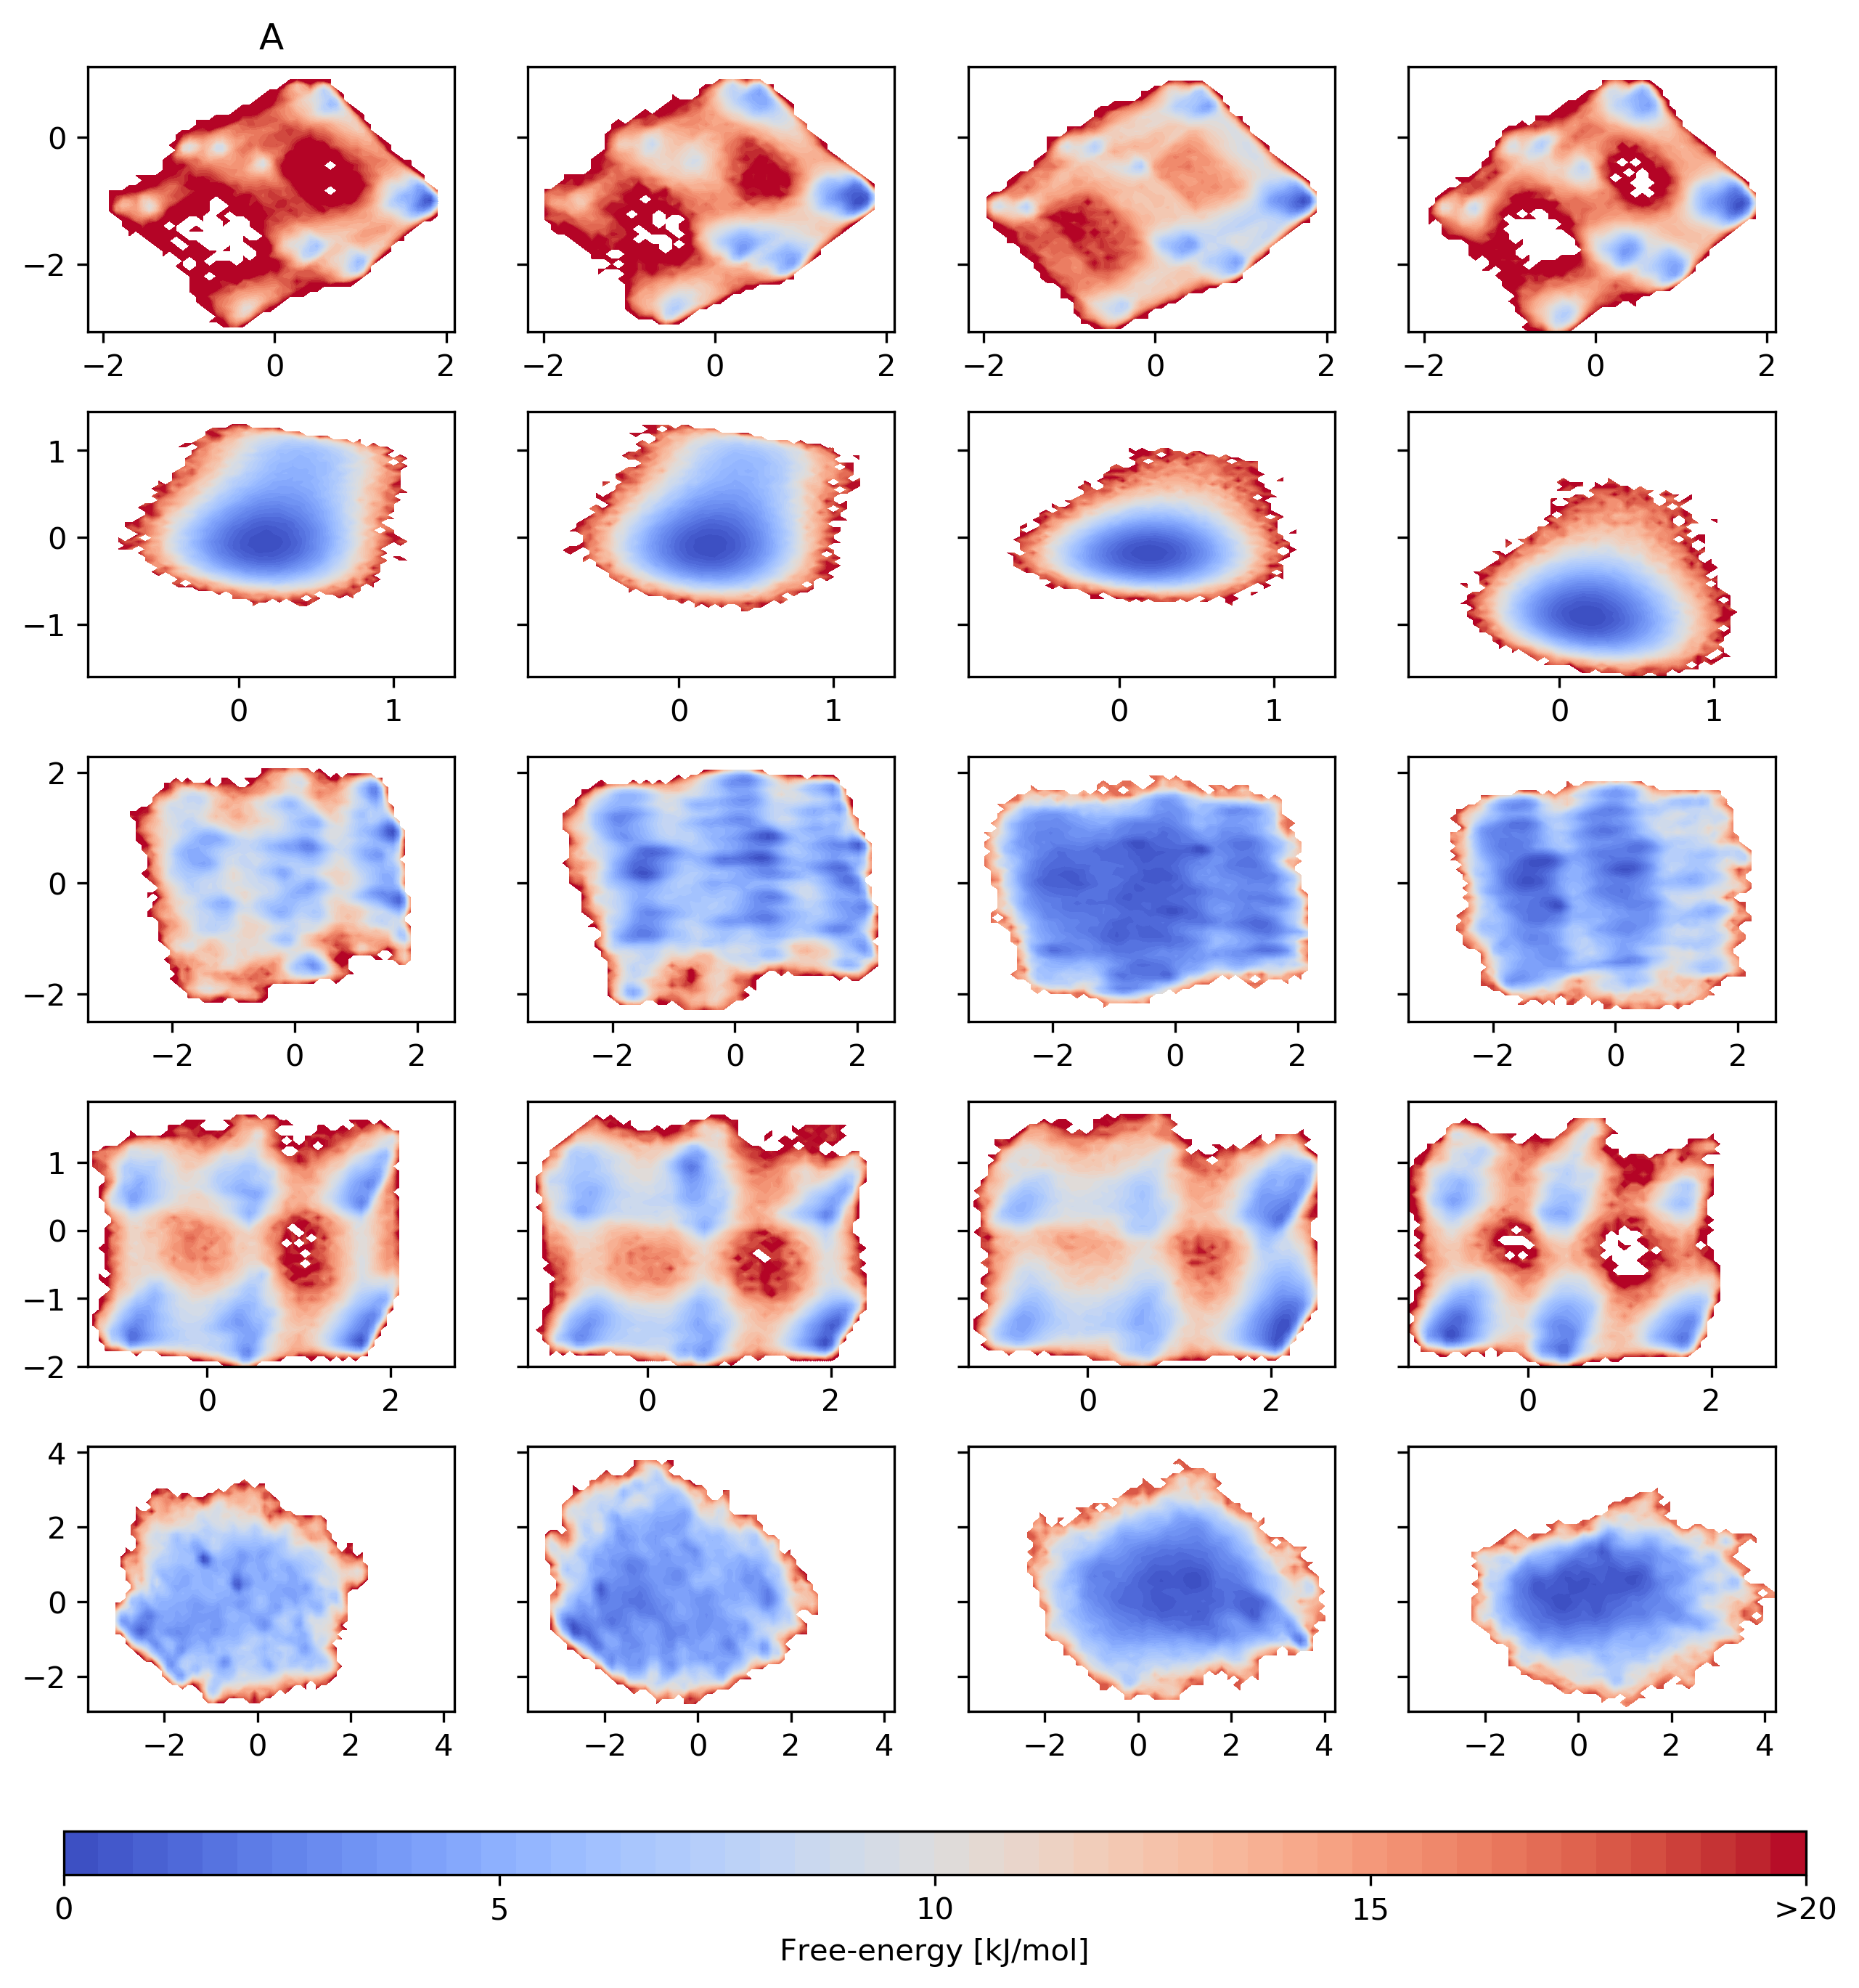

In [27]:
fig, axs = plt.subplots(len(PCA.keys()),len(ff), facecolor='white', sharey='row', sharex='row', dpi=300, figsize=(10,10), gridspec_kw={'hspace': 0.3})
for x,f in enumerate(ff):
    for y,p in enumerate(PCA.keys()):
        hist, bx, by = np.histogram2d(PCA[p][x][...,1], PCA[p][x][...,0], bins=50)
        fes = -np.log(hist) * (temp[y]*0.008314463)
        shift = np.min(fes)
        fes -= shift
        fes.T
        axs[y,x].contourf(fes, cmap='coolwarm', levels=50, vmax=20, extent=(bx[0],bx[-1], by[0],by[-1]))
        if (y==1) and (x==0):
            im = axs[y,x].contourf(fes, cmap='coolwarm', levels=50, vmax=20, extent=(bx[0],bx[-1], by[0],by[-1]))
    
cb_ax = fig.add_axes([0.114, 0.05, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal', label='Free-energy [kJ/mol]')
cbar.set_ticks(np.arange(0, 20.1, 5.0))
cbar.set_ticklabels(['0', '5', '10', '15', '>20'])

axs[0,0].set_title('A',)
axs[0,1].set_title('B')
axs[0,2].set_title('C')
axs[0,3].set_title('D')

axs[0,0].set_ylabel('A7')
axs[1,0].set_ylabel(r'P$_{13}$')
axs[2,0].set_ylabel('P-113')
axs[3,0].set_ylabel('Pep3')
axs[4,0].set_ylabel('Hst5')

#fig.text(0.5, 0.07, 'PC1', ha='center')
#fig.text(0.07, 0.5, 'PC2', rotation='vertical')
plt.savefig('pca_all.png', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

/storage1/francesco/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


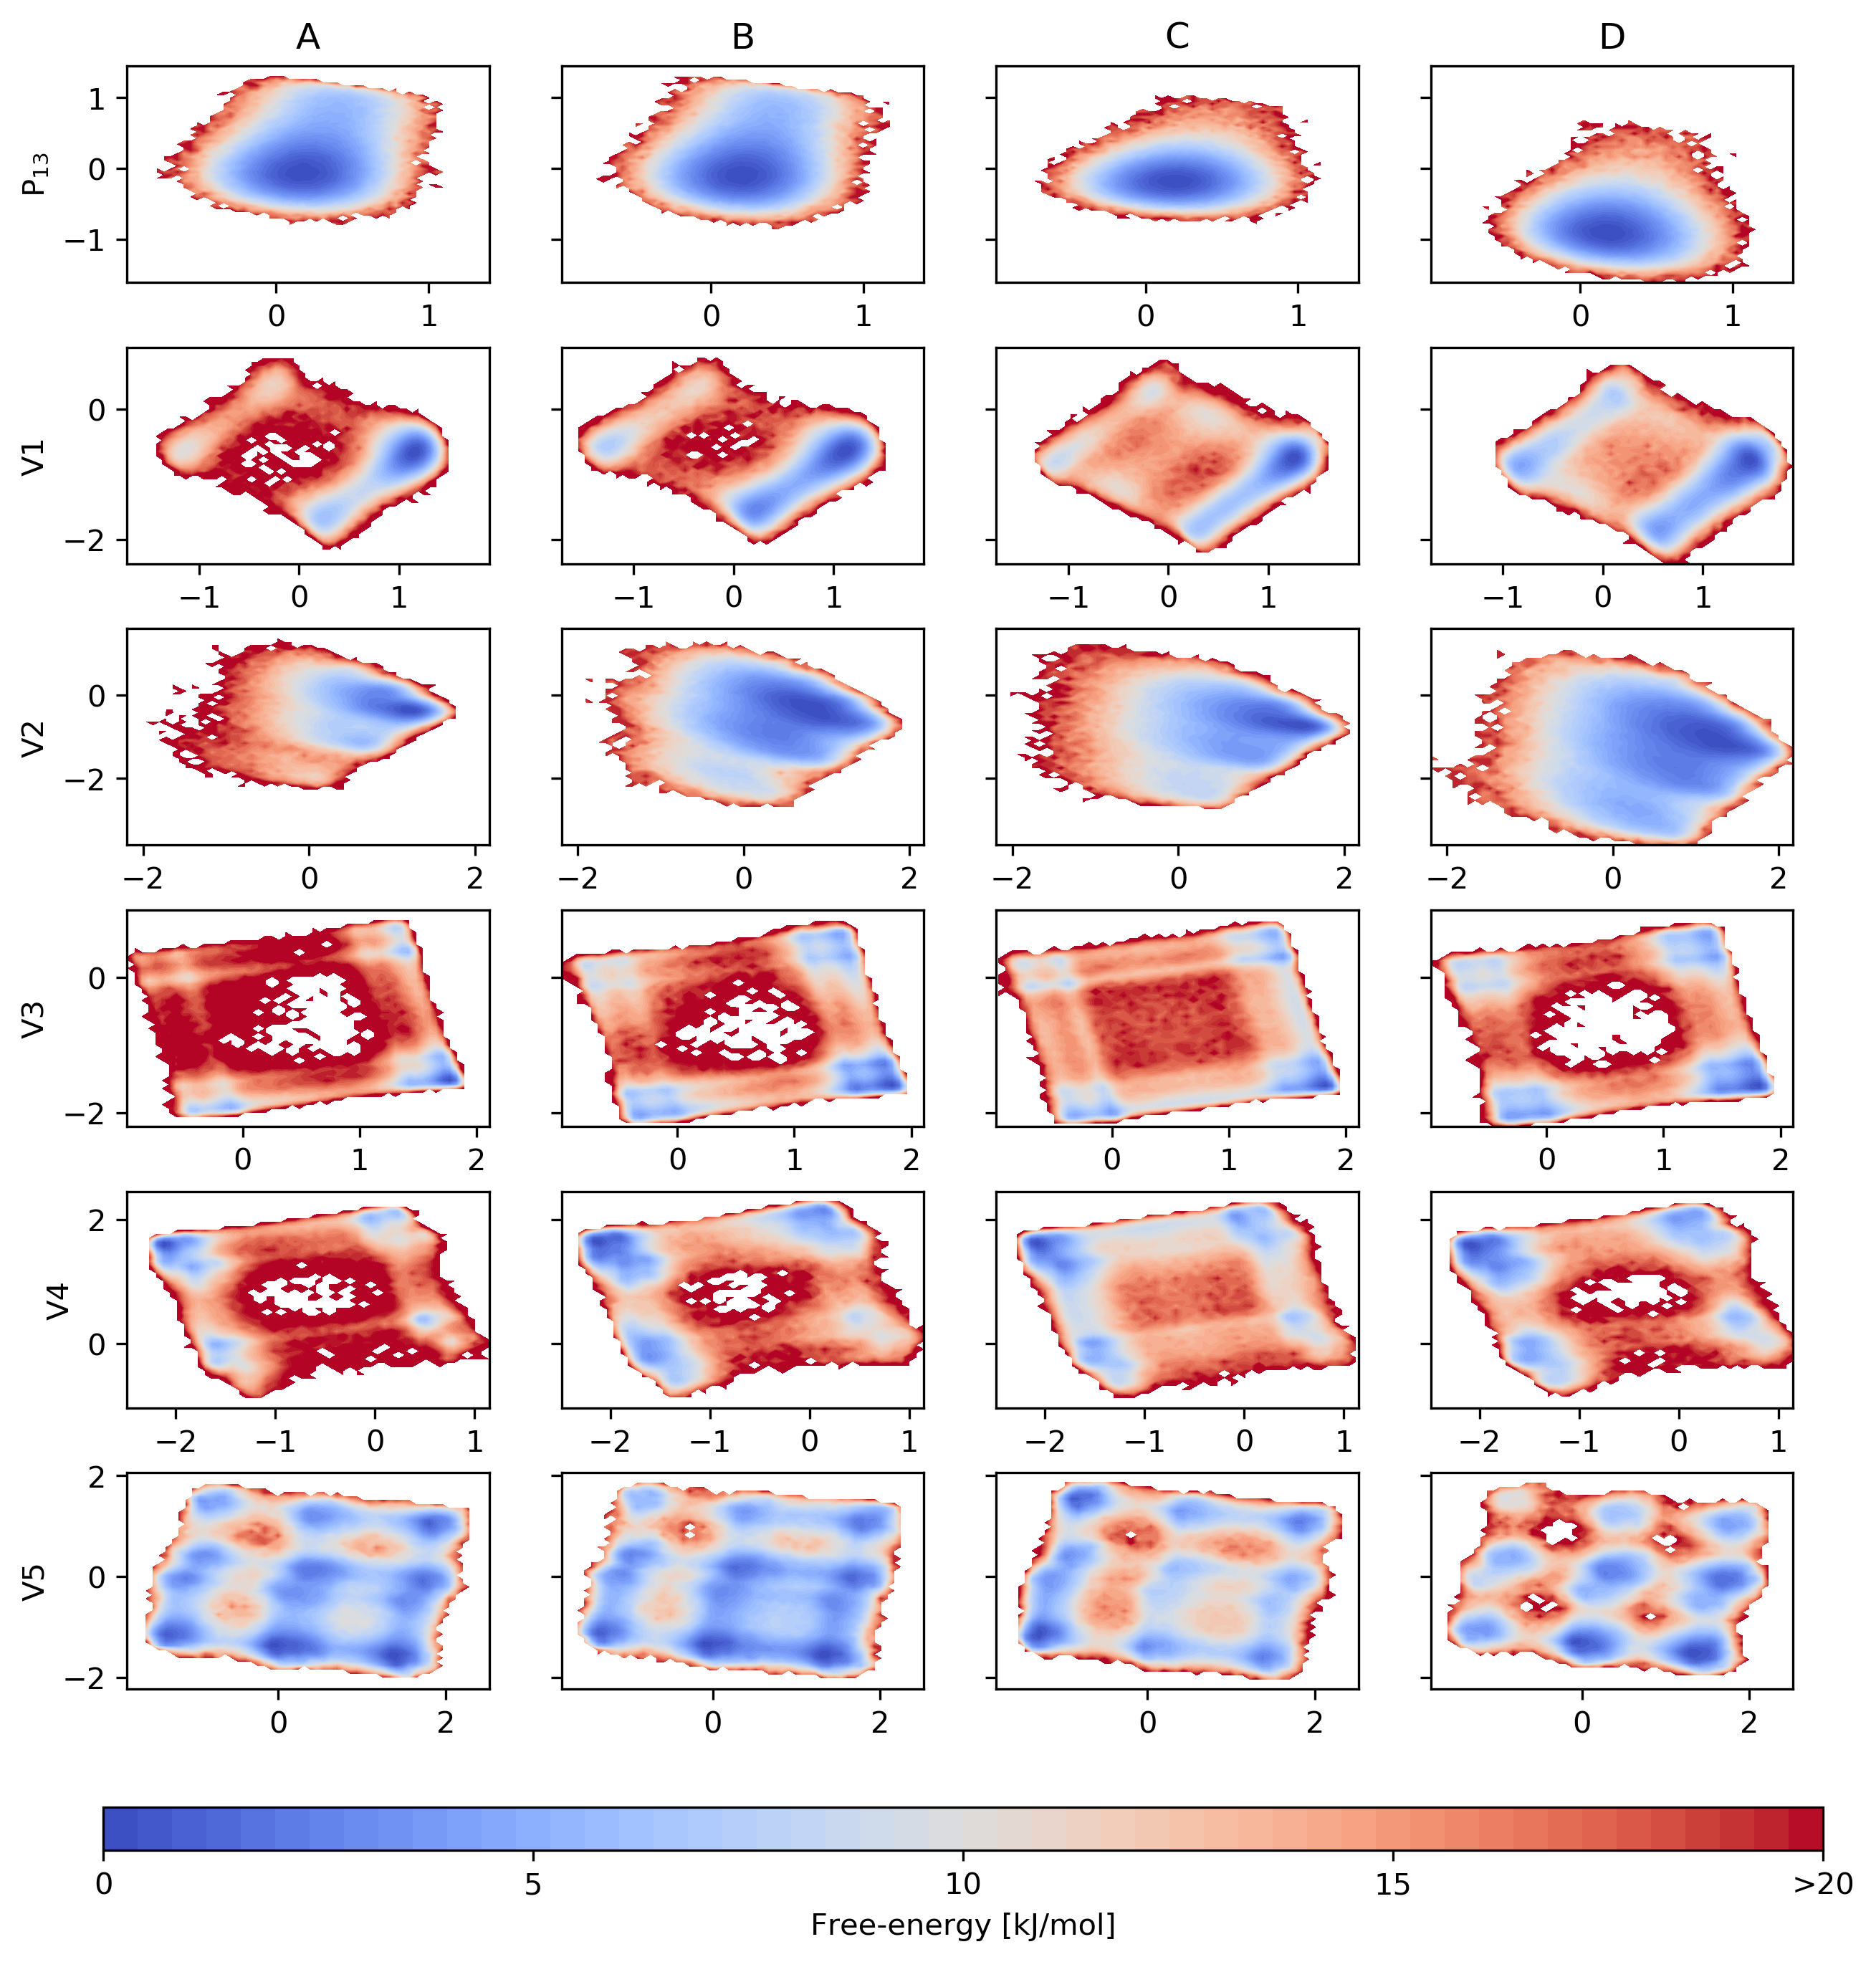

In [23]:
fig, axs = plt.subplots(len(PCAv.keys()),len(ff), facecolor='white', sharey='row', sharex='row', dpi=300, figsize=(10,10), gridspec_kw={'hspace': 0.3})
for x,f in enumerate(ff):
    for y,p in enumerate(PCAv.keys()):
        hist, bx, by = np.histogram2d(PCAv[p][x][...,1], PCAv[p][x][...,0], bins=50)
        fes = -np.log(hist) * (300*0.008314463)
        shift = np.min(fes)
        fes -= shift
        axs[y,x].contourf(fes, cmap='coolwarm', levels=50, vmax=20, extent=(bx[0],bx[-1], by[0],by[-1]))
        if (y==0) and (x==0):
            im = axs[y,x].contourf(fes, cmap='coolwarm', levels=50, vmax=20, extent=(bx[0],bx[-1], by[0],by[-1]))

cb_ax = fig.add_axes([0.114, 0.05, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal', label='Free-energy [kJ/mol]')
cbar.set_ticks(np.arange(0, 20.1, 5.0))
cbar.set_ticklabels(['0', '5', '10', '15', '>20'])

axs[0,0].set_title('A')
axs[0,1].set_title('B')
axs[0,2].set_title('C')
axs[0,3].set_title('D')

axs[0,0].set_ylabel(r'P$_{13}$')
axs[1,0].set_ylabel('V1')
axs[2,0].set_ylabel('V2')
axs[3,0].set_ylabel('V3')
axs[4,0].set_ylabel('V4')
axs[5,0].set_ylabel('V5')

#fig.text(0.5, 0.07, 'PC1', ha='center')
#fig.text(0.07, 0.5, 'PC2', rotation='vertical')
plt.savefig('pca_v.png', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [18]:
min_P13_disp = min_analyse(pca_P13[0], traj_P13_disp, pdb_P13_disp, open('P13/SS.txt').readlines(), 13)

In [19]:
min_P13_c36m = min_analyse(pca_P13[3], traj_P13_c36m, pdb_P13_c36m, open('steph_sim/Francesco/c36m/P13_CHARMM36m/SS.txt').readlines(), 13)

In [20]:
print('A99sb-disp <Rg>: '+str(min_P13_disp[2])+' nm')
print('c36m <Rg>: '+str(min_P13_c36m[2])+' nm')

A99sb-disp <Rg>: 1.1431385467415314 nm
c36m <Rg>: 1.1056012338977412 nm


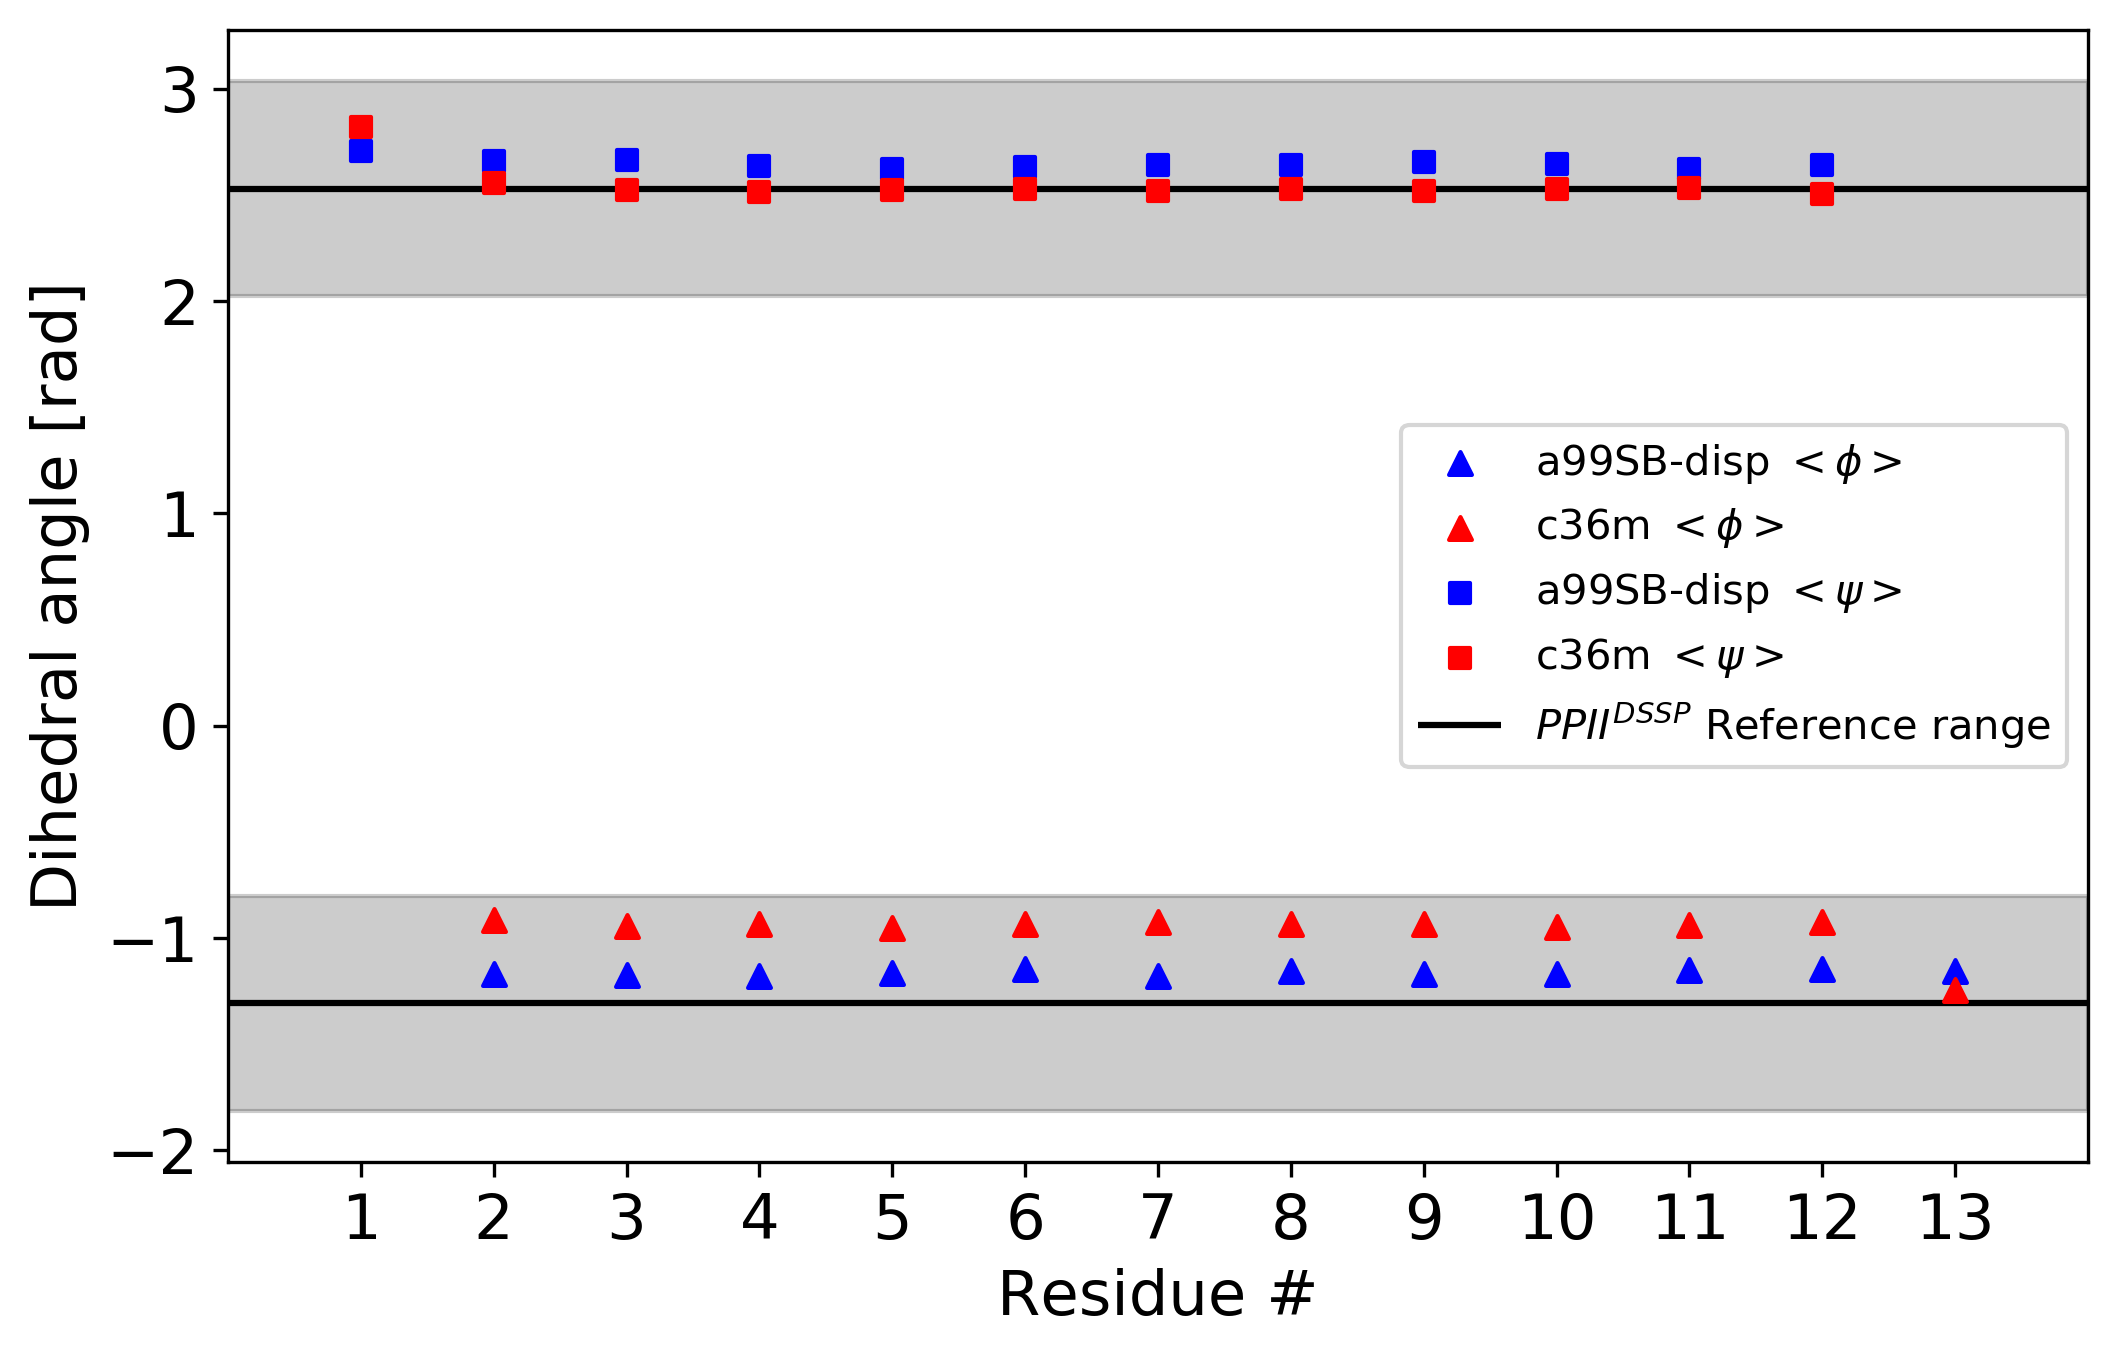

In [41]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,5),facecolor='w',dpi=300)

plt.scatter(np.arange(2,14), min_P13_disp[3][0], c='blue', label=r'a99SB-disp $<\phi>$', s=30,zorder=100,marker='^')
plt.scatter(np.arange(2,14), min_P13_c36m[3][0], c='red', label=r'c36m $<\phi>$', s=30,zorder=100, marker='^')
plt.hlines(PHIt,0,14)
plt.fill_between([0,14],[PHIt-eps,PHIt-eps],[PHIt+eps,PHIt+eps],color='k',alpha=0.2)

plt.scatter(np.arange(1,13), min_P13_disp[4][0], c='blue', label=r'a99SB-disp $<\psi>$', marker='s', s=25,zorder=100)
plt.scatter(np.arange(1,13), min_P13_c36m[4][0], c='red', label=r'c36m $<\psi>$', marker='s',s=25, zorder=100)
plt.hlines(PSIt,0,14, label=r'$PPII^{DSSP}$ Reference range')
plt.fill_between([0,14],[PSIt-eps,PSIt-eps],[PSIt+eps,PSIt+eps],color='k',alpha=0.2)

plt.ylabel('Dihedral angle [rad]')
plt.xlabel('Residue #')
plt.legend(fontsize=10)
plt.xlim(0,14)
plt.xticks(np.arange(1,14))
plt.show()

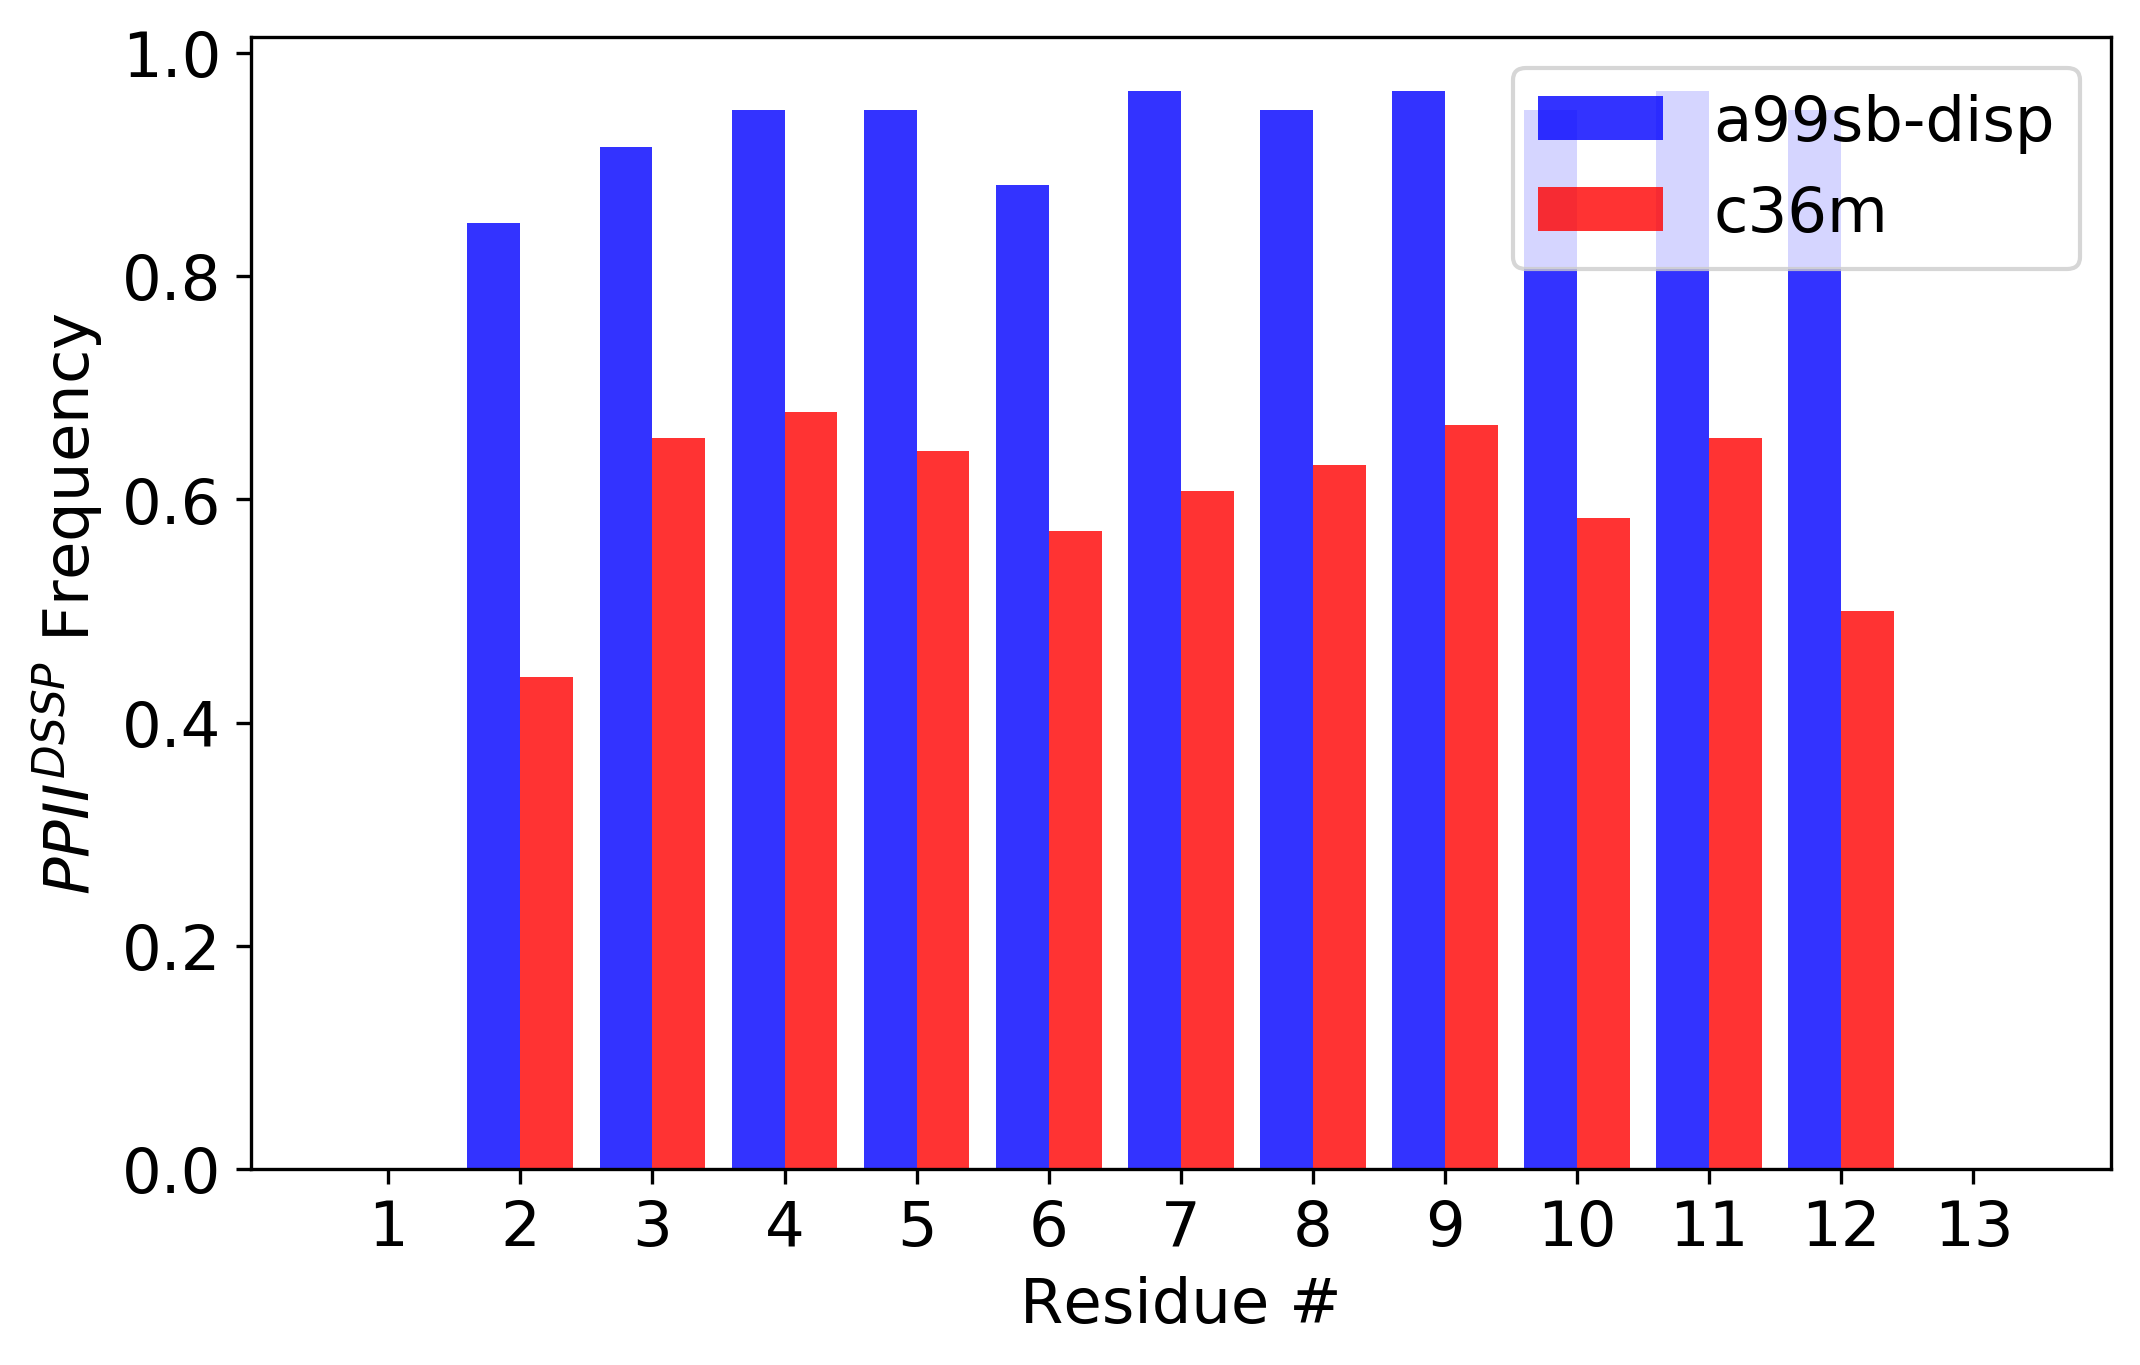

In [42]:
plt.figure(figsize=(8,5),facecolor='w',dpi=300)

width = 0.4
x = np.arange(1,14)
plt.bar(x - width/2, min_P13_disp[-2]['P'], label='a99sb-disp',color='blue',width=width,alpha=0.8)
plt.bar(x + width/2, min_P13_c36m[-2]['P'], label='c36m',color='red',width=width,alpha=0.8)

plt.xticks(x)
plt.xlabel('Residue #')
plt.ylabel(r'$PPII^{DSSP}$ Frequency')
plt.legend()
plt.show()

In [29]:
for i in range(len(min_P13_disp[0])):
    print(min_P13_disp[0][i],min_P13_disp[-1][i])

643 [1.13988775]
1829 [1.13045842]
4137 [1.10109835]
5997 [1.12366397]
6224 [1.12795493]
6934 [1.14062165]
7447 [1.13117434]
8406 [1.16099111]
8840 [1.14166265]
9687 [1.1443229]
10597 [1.16027867]
10964 [1.14843122]
12034 [1.16465097]
12275 [1.12284997]
13437 [1.1524405]
13492 [1.11350796]
13529 [1.16518998]
15688 [1.14229361]
15911 [1.15194525]
17408 [1.13202447]
17454 [1.16634495]
17993 [1.12367767]
18151 [1.14514762]
18464 [1.14240887]
18888 [1.14175184]
19194 [1.12741116]
19606 [1.12037746]
19677 [1.14078292]
20263 [1.11512414]
20815 [1.14808084]
21242 [1.16645821]
21811 [1.12280824]
22389 [1.14671345]
22497 [1.12707801]
22665 [1.14681517]
23239 [1.09190145]
24244 [1.14581781]
24348 [1.12353492]
24515 [1.15745115]
24747 [1.15994887]
26123 [1.1515823]
26239 [1.14535645]
27857 [1.13425231]
28582 [1.16145711]
29832 [1.13346893]
29880 [1.1370856]
30197 [1.14661841]
30996 [1.1223232]
32010 [1.057733]
32692 [1.14310172]
32926 [1.14185748]
33015 [1.17952295]
33970 [1.13062233]
34182 [1.12

In [43]:
for i in range(len(min_P13_c36m[0])):
    print(min_P13_c36m[0][i],min_P13_c36m[-1][i])

222 [1.08993279]
405 [1.08394978]
996 [1.11167012]
1210 [1.09759142]
1931 [1.07831292]
2154 [1.11822459]
2665 [1.0866388]
3027 [1.11425502]
3292 [1.1163582]
4190 [1.10543526]
4352 [1.10762077]
4960 [1.06378744]
5393 [1.11815043]
6238 [1.06406065]
6429 [1.13790618]
6435 [1.14862302]
7412 [1.10101054]
7614 [1.12881734]
7798 [1.13078643]
8680 [1.10170227]
8899 [1.12877302]
9493 [1.12225017]
10061 [1.11659937]
11136 [1.11135227]
12207 [1.06902223]
12381 [1.10530867]
13137 [1.08978941]
13857 [1.12459196]
14665 [1.11333791]
14683 [1.09392158]
15352 [1.10909096]
15823 [1.09735334]
16055 [1.08165242]
17385 [1.08268446]
18054 [1.12391228]
18078 [1.07147695]
18178 [1.14182595]
19463 [1.11427913]
19485 [1.10534424]
19883 [1.14584891]
20491 [1.0724556]
21529 [1.0649138]
22735 [1.10335644]
22900 [1.11676333]
23907 [1.12016892]
23989 [1.11540043]
25575 [1.12654499]
25937 [1.12023164]
26639 [1.11066853]
26685 [1.06582909]
26942 [1.05485943]
28115 [1.0740497]
29483 [1.12406703]
29890 [1.12710543]
3050

384178 [1.12538053]
384693 [1.09903358]
385394 [1.11813957]
385723 [1.1065211]
385825 [1.09857718]
386360 [1.1106601]
387254 [1.04472756]
387322 [1.09761743]
387434 [1.11078573]
387555 [1.08036516]
388056 [1.10361316]
388085 [1.13742601]
388637 [1.11936273]
389275 [1.12569716]
389546 [1.11628402]
390409 [1.09095785]
390797 [1.13355483]
391180 [1.13613883]
392151 [1.11210449]
392610 [1.13724326]
393725 [1.1068314]
394496 [1.09876211]
394963 [1.0679444]
395097 [1.10862797]
395369 [1.11844237]
396223 [1.06819704]
396658 [1.1389404]
397287 [1.11409076]
397307 [1.1220064]
397465 [1.12804779]
397793 [1.07436434]
397835 [1.11358901]
398199 [1.12917789]
399315 [1.07845331]
400093 [1.10748342]
400596 [1.10792344]
401355 [1.10123478]
402327 [1.13437842]
402908 [1.11398608]
402992 [1.10375864]
403113 [1.10243837]
404845 [1.11100683]
406324 [1.12386837]
408913 [1.00721449]
409734 [1.13333954]
410384 [1.10804485]
410386 [1.10009832]
411433 [1.07927272]
411450 [1.09225631]
412146 [1.12225334]
412991

In [ ]:
t_P13_disp = md.load(traj_P13_disp, top=pdb_P13_disp)

#475434 [ 0.20031554 -0.06212452] [1.12734584]
#292599 [1.11004275]

t_P13_disp[292599].save_pdb('disp_292599.pdb')

In [ ]:
t_P13_c36m = md.load(traj_P13_c36m, top=pdb_P13_c36m)


#472810 [-0.6715717   0.04741822] [1.12733141]
#139482 [1.11002747]

t_P13_c36m[472810].save_pdb('c36m_139482.pdb')

# CD

In [ ]:
#Hack for SESCA bug
def SESCA_dih_corr(dih,out,last):
    in_ = open(dih).readlines()
    out_ = open(out, 'w')  
    for l in in_:
        if l.startswith('#'):
            if not l.startswith('#DISICL    0'):
                out_.write(l)
            else:
                l = l.split()
                l[4] = str(int(l[4])+1)
                l[5] = '[2-'+str(last+1)+']\n'
                l = '\t'.join(l)
                out_.write(l)
        else:
            if int(l.split()[1]) != last:
                out_.write(l)
            elif int(l.split()[1]) == last:
                out_.write(l)
                time = l.split()[0]
                n = str(last+1)
                phi = str(l.split()[2])
                psi = str(l.split()[3])
                out_.write(time+'\t'+n+'\t'+phi+'\t'+psi+'\n')
    out_.close()

In [98]:
PHIt = -75.0*(3.14/180)
PSIt = 145.0*(3.14/180)
eps = 29*(3.14/180)

basis_set = ('DS6-1', 'DS5-4', 'DS-dT', 'DS-dTSC3', 'DS5-4SC1', 'DS6-1SC1')
folder = {'HST5': '/storage1/francesco/PROJECTS/PPII/CD/HST5/',
         'A7': '/storage1/francesco/PROJECTS/PPII/CD/A7/',
         'P-113': '/storage1/francesco/PROJECTS/PPII/CD/P-113/'}


exps = {
    'A7' : np.loadtxt(folder['A7']+'a7cd.txt'),
    'P-113': np.loadtxt(folder['P-113']+'cd2.txt'),
    'HST5': np.loadtxt('/storage1/francesco/PROJECTS/HST5/EXP/CD/sub_sgf-75_150_20.dat')
    
}

exps['A7'][...,1] =exps['A7'][...,1]/1000
prots = ('A7', 'P-113', 'HST5') 
ff = ('disp', 'ildn', 'c36idp', 'c36m')

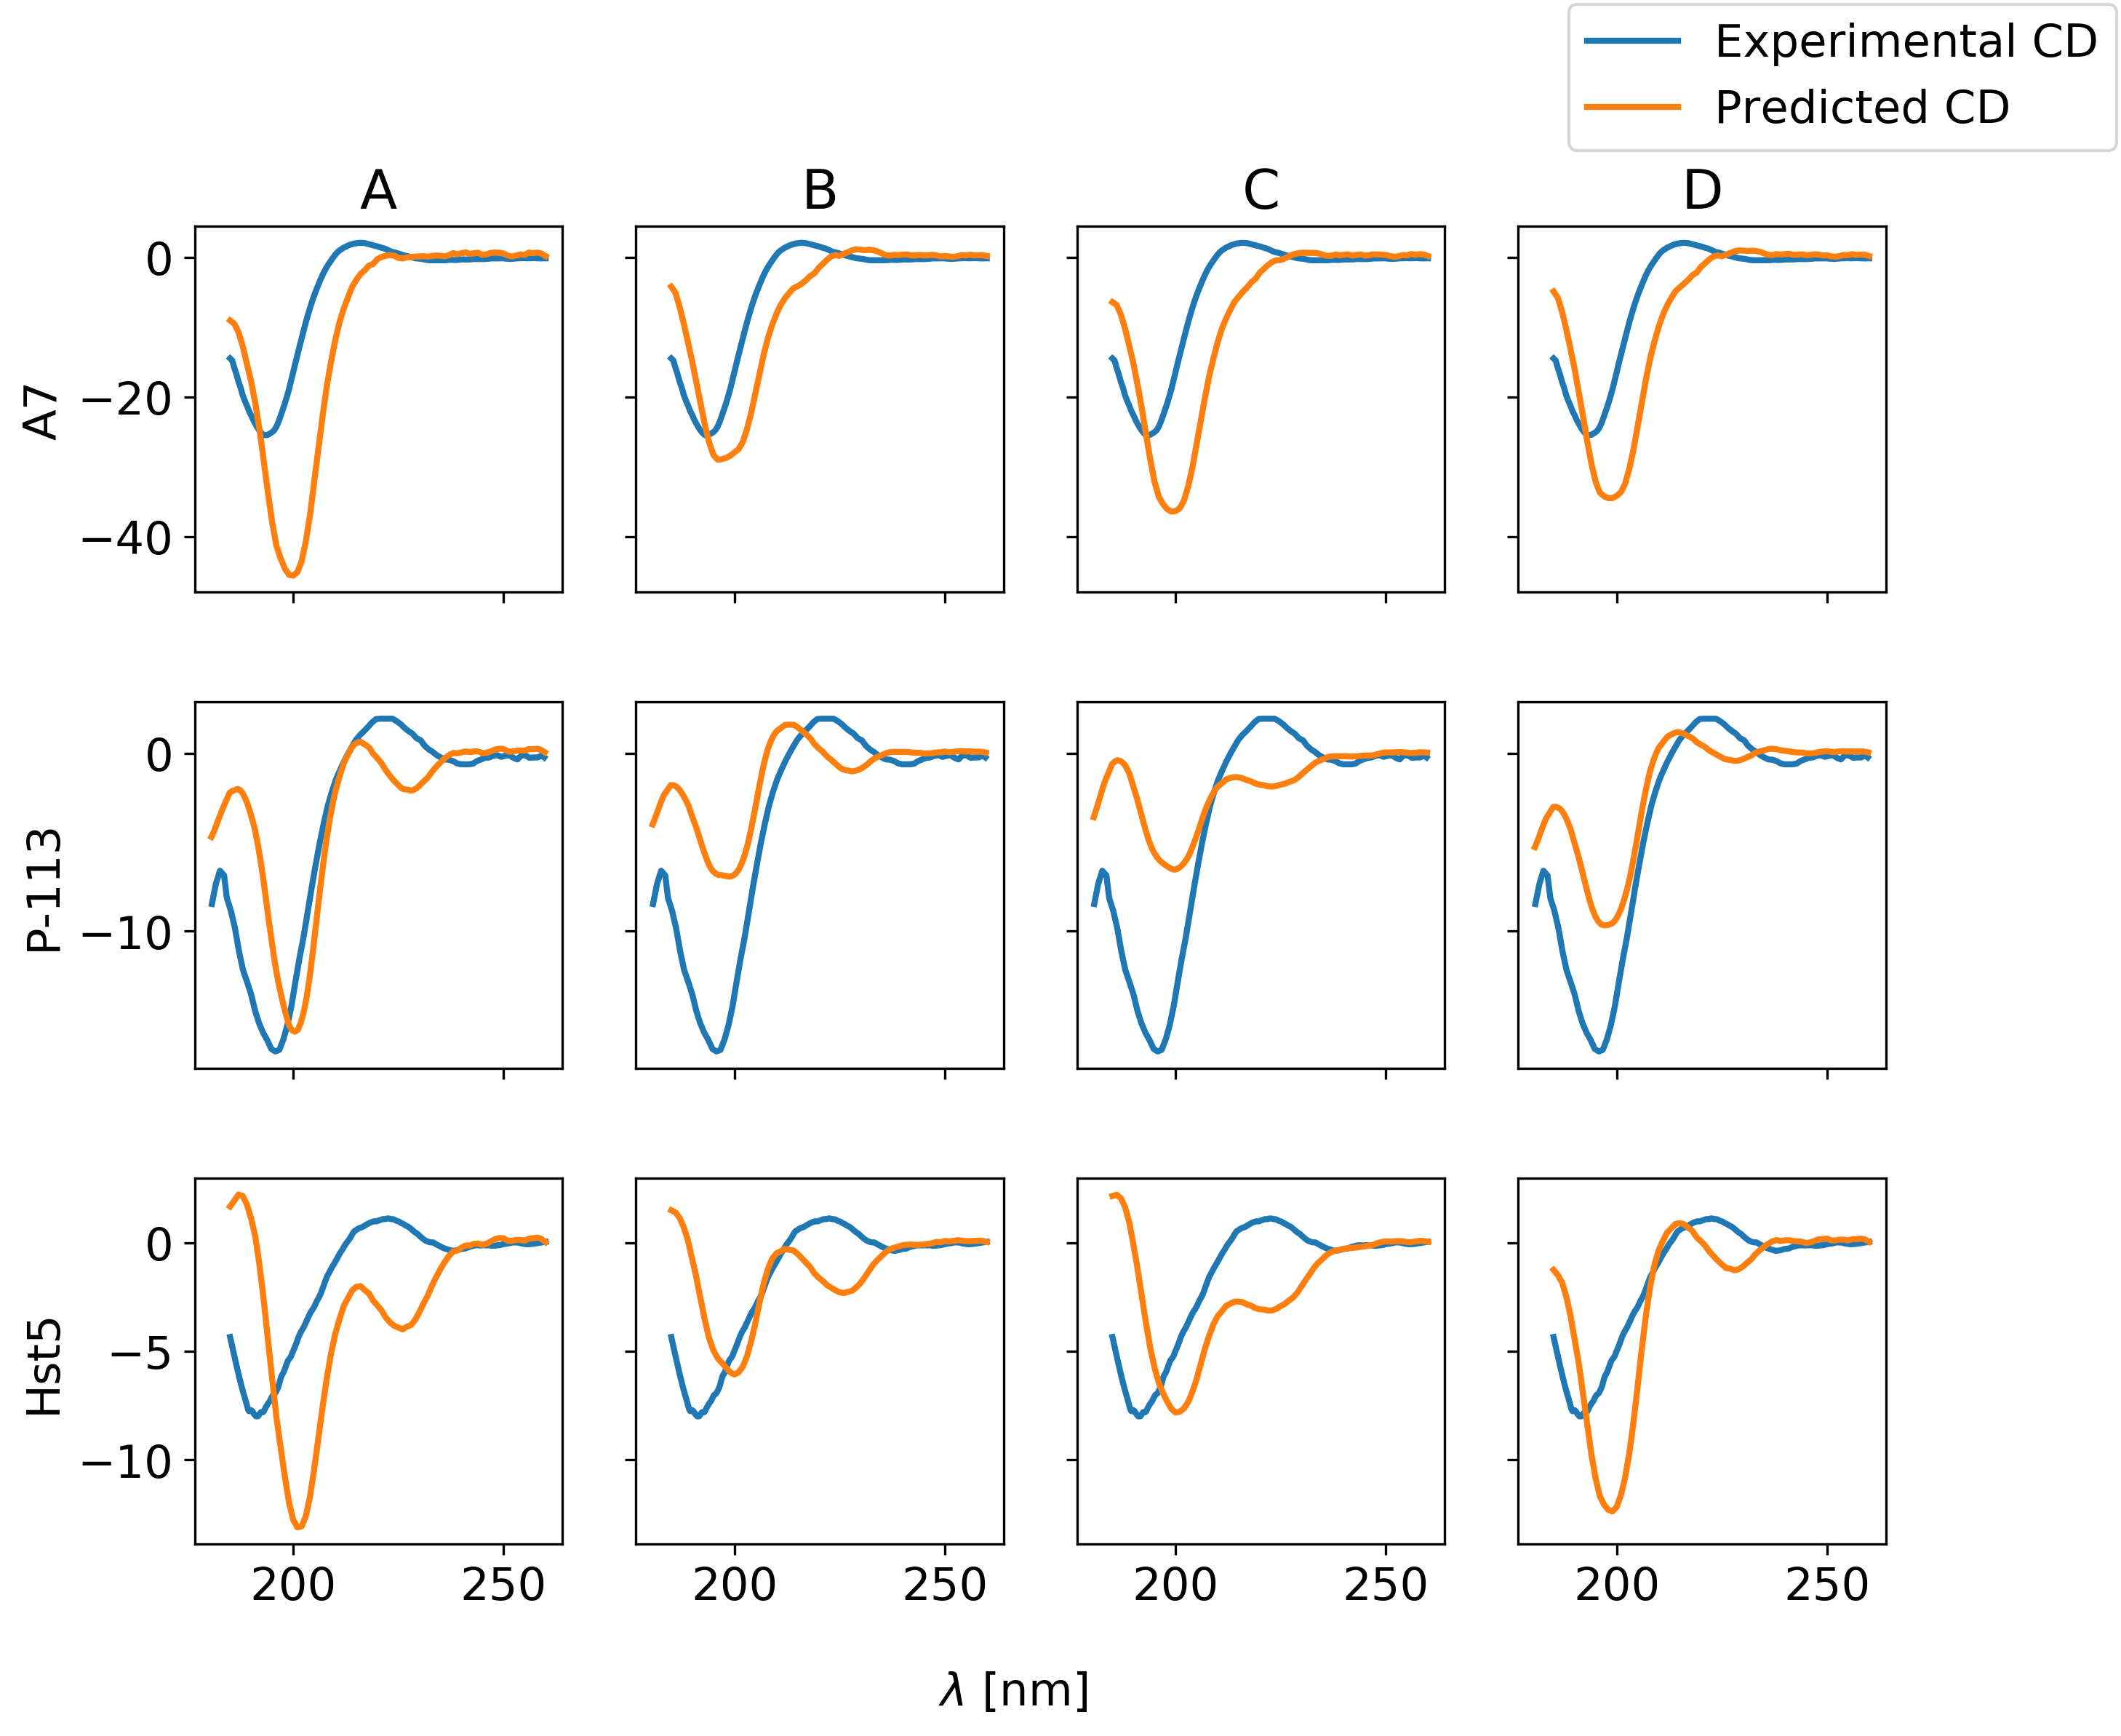

In [101]:
fig, axs = plt.subplots(len(folder.keys()),len(ff), facecolor='white', sharey='row', sharex='col', dpi=300, figsize=(10,8), gridspec_kw={'hspace': 0.3})
for x,f in enumerate(ff):
    for y,p in enumerate(prots): 
        cd = np.loadtxt(folder[p]+f+'/DS6-1SC1.out')
        axs[y,x].plot(exps[p][...,0], exps[p][...,1], label='Experimental CD', linewidth=2)
        axs[y,x].plot(cd[...,0], cd[...,2], label='Predicted CD', linewidth=2)
        
axs[0,0].set_title('A')
axs[0,1].set_title('B')
axs[0,2].set_title('C')
axs[0,3].set_title('D')

axs[0,0].set_ylabel('A7')
axs[1,0].set_ylabel('P-113')
axs[2,0].set_ylabel('Hst5')

handles, labels = axs[y,x].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', borderaxespad=0.1)
fig.text(0.5, 0.04, r'$\lambda$ [nm]', ha='center', va='center')

plt.savefig('cd.png', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

# J-COUPLING

In [119]:
def jcoupling(jtype, residue, phi, psi):
    
    if jtype == "3J-HNHA":
        A = 7.09
        B = 1.42
        C = 1.55
        eq = A*(np.cos(phi[...,residue-2]-60*np.pi/180))**2 - B*(np.cos(phi[...,residue-2]-60*np.pi/180)) + C
    elif jtype == "3J-HNC":
        A = 4.29
        B = 1.01
        eq = A*(np.cos(phi[...,residue-2]+180*np.pi/180))**2 - B*(np.cos(phi[...,residue-2]-60*np.pi/180))        
    elif jtype == "3J-HAC":
        A = 3.72
        B = 2.18
        C = 1.28
        eq = A*(np.cos(phi[...,residue-2]+120*np.pi/180))**2 - B*(np.cos(phi[...,residue-2]+120*np.pi/180)) + C      
    elif jtype == "3J-HNCB":
        A = 3.06
        B = 0.74
        C = 0.13
        eq = A*(np.cos(phi[...,residue-2]+60*np.pi/180))**2 - B*(np.cos(phi[...,residue-2]+60*np.pi/180)) + C
    elif jtype == "1J-NCA":
        if residue <= np.shape(phi)[1]:
            A = 1.70
            B = 0.98
            C = 9.51
            eq = A*(np.cos(psi[...,residue-1]))**2 - B*np.cos(psi[...,residue-1]) + C
        else:
            eq = [0]
    elif jtype == "2J-NCA":
        A = -0.66
        B = 1.52
        C = 7.85
        eq = A*(np.cos(psi[...,residue-1]))**2 - B*np.cos(psi[...,residue-1]) + C
    elif jtype == "3J-HNCA":
        eq = -0.23*np.cos(phi[...,residue-2]) - 0.20*np.cos(psi[...,residue-2]) + 0.07*np.sin(phi[...,residue-2]) + 0.08*np.sin(psi[...,residue-2]) + 0.07*np.cos(phi[...,residue-2])*np.cos(psi[...,residue-2]) + 0.12*np.cos(phi[...,residue-2])*np.sin(psi[...,residue-2]) - 0.08*np.sin(phi[...,residue-2])*np.cos(psi[...,residue-2]) - 0.14*np.sin(phi[...,residue-2])*np.sin(psi[...,residue-2]) + 0.54
    else:
        print('ERROR! Missing jtype '+str(jtype))
    
    if len(eq) > 1:
        return eq.mean()
    else:
        return np.nan
    
def chi2(obs,exp,err):
    chi2 = (((obs-exp)**2) / err**2).sum()
    return(chi2)

def karplus(theta, A,B,C):
    base_eq = A*(np.cos(theta)**2) + B*(np.cos(theta)) + C
    return base_eq

def jcoupling_KLL(jtype, residue, phi, psi, traj):
    
    top=traj.topology
    
    if jtype == "3J-HNHA":
        A = 8.33
        B = -1.69
        C = 0.44
        dih = []
        dih.append( top.select('resid '+str(residue-1)+' and (name H)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name N)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name CA)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name HA)')[0] )
        theta = md.compute_dihedrals(traj, np.array(dih).reshape(1,4))
        eq = karplus(theta,A,B,C)
        
    elif jtype == "3J-HNC":
        A = 5.5
        B = -1.30
        C = -0.16
        dih = []
        dih.append( top.select('resid '+str(residue-1)+' and (name H)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name N)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name CA)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name C)')[0] )
        theta = md.compute_dihedrals(traj, np.array(dih).reshape(1,4))
        eq = karplus(theta,A,B,C)
        
    elif jtype == "3J-HAC":
        A = 4.41
        B = -2.14
        C = 0.77
        dih = []
        dih.append( top.select('resid '+str(residue-1)+' and (name HA)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name CA)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name N)')[0] )
        dih.append( top.select('resid '+str(residue-2)+' and (name C)')[0] )
        theta = md.compute_dihedrals(traj, np.array(dih).reshape(1,4))
        eq = karplus(theta,A,B,C)
        
    elif jtype == "3J-HNCB":
        A = 3.4
        B = -0.75
        C = -0.08
        dih = []
        dih.append( top.select('resid '+str(residue-1)+' and (name H)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name N)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name CA)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name CB)')[0] )
        theta = md.compute_dihedrals(traj, np.array(dih).reshape(1,4))
        eq = karplus(theta,A,B,C)
        
    elif jtype == "1J-NCA":
        if residue <= np.shape(phi)[1]:
            A = 1.70
            B = 0.98
            C = 9.51
            eq = A*(np.cos(psi[...,residue-1]))**2 - B*np.cos(psi[...,residue-1]) + C
        else:
            eq = [0]
    elif jtype == "2J-NCA":
        A = -0.66
        B = 1.52
        C = 7.85
        eq = A*(np.cos(psi[...,residue-1]))**2 - B*np.cos(psi[...,residue-1]) + C
    elif jtype == "3J-HNCA":
        eq = -0.23*np.cos(phi[...,residue-2]) - 0.20*np.cos(psi[...,residue-2]) + 0.07*np.sin(phi[...,residue-2]) + 0.08*np.sin(psi[...,residue-2]) + 0.07*np.cos(phi[...,residue-2])*np.cos(psi[...,residue-2]) + 0.12*np.cos(phi[...,residue-2])*np.sin(psi[...,residue-2]) - 0.08*np.sin(phi[...,residue-2])*np.cos(psi[...,residue-2]) - 0.14*np.sin(phi[...,residue-2])*np.sin(psi[...,residue-2]) + 0.54
    else:
        print('ERROR! Missing jtype '+str(jtype))
    
    if len(eq) > 1:
        return eq.mean()
    else:
        return np.nan

In [24]:
a7_t = {'A' : md.load(traj_a7_disp, top=pdb_a7_disp),
       'B' : md.load(traj_a7_ildn, top=pdb_a7_ildn),
       'C' : md.load(traj_a7_c36idp, top=pdb_a7_c36idp),
       'D' : md.load(traj_a7_c36m, top=pdb_a7_c36m)}

In [252]:
A = -0.66
B = 1.52
C = 7.85
nca = []
for i in np.arange(-3.14,3.141,0.1):
    nca.append( karplus(i,A,B,C) )

theta = {'A' : [],
        'B' : [],
        'C' : [],
        'D' : []}
for k,v in a7_t.items():
    top=v.topology
    for residue in range(1,7):
        dih = []
        dih.append( top.select('resid '+str(residue-1)+' and (name H)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name N)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name CA)')[0] )
        dih.append( top.select('resid '+str(residue-1)+' and (name HA)')[0] )
        theta[k].append( md.compute_dihedrals(v, np.array(dih).reshape(1,4)) )

In [279]:
exp_jc

jtype  res     jc           err
0   3J-HNHA    2   5.61  4.000000e-02
1    3J-HNC    2   1.15  2.000000e-02
2    3J-HAC    2   1.89  3.200000e-01
3   3J-HNCB    2   2.31  5.000000e-02
4    1J-NCA    2  11.37  1.000000e-02
5    2J-NCA    1   9.17  2.000000e-02
6   3J-HNCA    2   0.71  2.000000e-02
7   3J-HNHA    3   5.66  1.000000e-02
8    3J-HNC    3   1.20  2.000000e-02
9    3J-HAC    3   1.85  2.000000e-01
10  3J-HNCB    3   2.20  1.000000e-01
11   1J-NCA    3  11.27  2.000000e-02
12   2J-NCA    2   8.52  3.000000e-02
13  3J-HNCA    3   0.66  1.000000e-02
14  3J-HNHA    4   5.77  2.000000e-02
15   3J-HNC    4   1.20  5.000000e-02
16   3J-HAC    4   1.80  1.400000e-01
17  3J-HNCB    4   2.23  2.000000e-02
18   1J-NCA    4  11.22  2.000000e-02
19   2J-NCA    3   8.29  3.000000e-02
20  3J-HNCA    4   0.56  4.000000e-02
21  3J-HNHA    5   5.92  2.000000e-02
22   3J-HNC    5   1.19  6.000000e-02
23   3J-HAC    5   1.56  2.500000e-01
24  3J-HNCB    5   2.23  8.000000e-02
25   1J-NCA    5  11.29  1.000000e-02
26   2J-NCA    4   8.22  4.000000e-02
27  3J-HNHA    6   6.04  3.000000e-02
28   3J-HNC    6   1.10  4.000000e-02
29   3J-HAC    6   1.67  2.000000e-01
30  3J-HNCB    6   2.21  4.000000e-02
31   1J-NCA    6  11.29  1.000000e-02
32   2J-NCA    5   8.24  1.000000e-02
33  3J-HNHA    7   6.60  3.000000e-02
34   3J-HNC    7   1.25  5.000000e-02
35   3J-HAC    7   2.03  1.400000e-01
36  3J-HNCB    7   1.99  1.200000e-01
37   2J-NCA    6   8.18  2.000000e-02
38  3J-HNCA    7   0.59  1.000000e-14

In [253]:
phis = {}
for k,v in a7_t.items():
    _, phi = md.compute_phi(v)
    phis[k] = phi

In [263]:
np.shape(np.array(theta['A']).T[0])

(500005, 6)

In [259]:
np.shape(phis['A'])

(500005, 6)

In [278]:
np.average( (np.array(theta['A']).T[0]+np.pi - phis['A']+np.pi) -3.14 )

3.1897628

In [272]:
np.array(theta['A']).T[0]+np.pi

array([[2.089314  , 5.384383  , 5.7318826 , 5.254324  , 5.656563  ,
        5.8861556 ],
       [2.0507092 , 5.709284  , 5.585782  , 5.6398277 , 5.957549  ,
        5.7134113 ],
       [6.2349205 , 0.60414886, 5.6982946 , 6.031313  , 5.921523  ,
        5.750894  ],
       ...,
       [0.15279031, 0.43951893, 0.5321126 , 0.89099574, 0.49959302,
        0.85191035],
       [0.24249005, 0.5356581 , 0.807565  , 0.9943011 , 0.6714587 ,
        0.3640287 ],
       [3.9804854 , 0.66480947, 1.106576  , 0.81119275, 0.43093824,
        1.0872557 ]], dtype=float32)

In [274]:
phis['A']+np.pi

array([[0.4818189 , 0.67214894, 0.4112103 , 0.5915568 , 0.58833194,
        0.6085918 ],
       [0.50164914, 0.4561572 , 0.41795325, 0.6879883 , 0.59767604,
        0.4253583 ],
       [1.7670628 , 0.24432778, 0.67499447, 0.6328292 , 0.5504458 ,
        0.6456609 ],
       ...,
       [1.5475787 , 1.9721285 , 2.1018176 , 1.7570523 , 1.7445874 ,
        2.280284  ],
       [1.6652808 , 1.8116494 , 1.913827  , 1.80312   , 1.5697037 ,
        1.879083  ],
       [1.7874423 , 1.9677333 , 2.0521383 , 1.907691  , 1.7672232 ,
        2.0058713 ]], dtype=float32)

In [152]:
hnha_kde = {}
for k,v in theta.items():
    a = np.array(v).reshape( np.shape(v)[0]*np.shape(v)[1] )
    x = np.linspace( -np.pi, np.pi, num = 200 )
    hnha_kde[k] = (np.array([x, scs.gaussian_kde( a, bw_method = "silverman" ).evaluate(x)]))


In [209]:
b = np.average(exp_jc[exp_jc.jtype == "3J-HNHA"].jc)

5.933333333333334

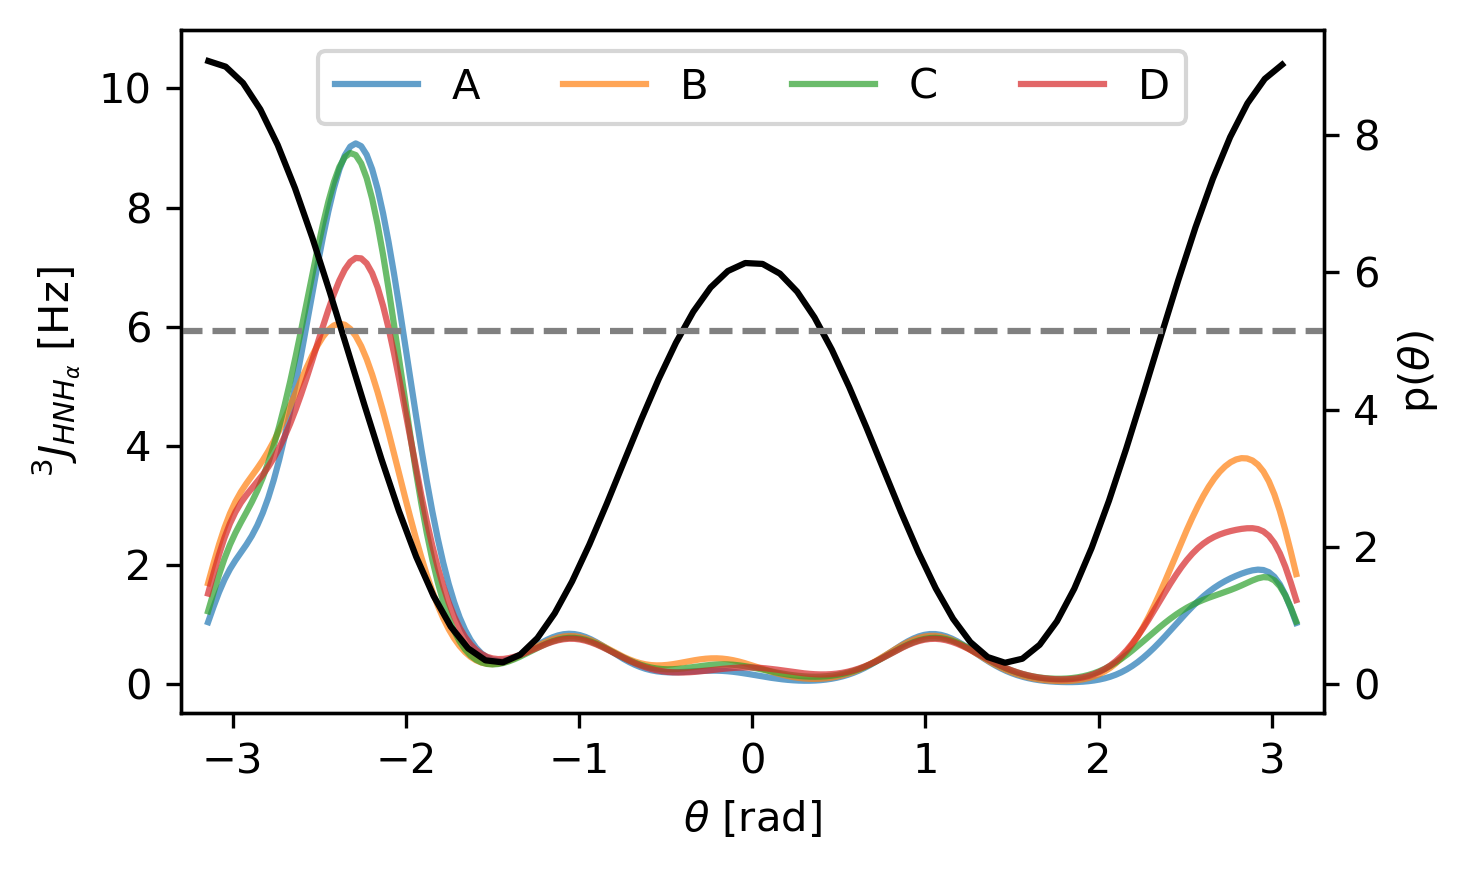

In [218]:
fig, ax1 = plt.subplots(figsize=(5,3),facecolor='w',dpi=300)
ax1.plot(np.arange(-3.14,3.14,0.1), hnha, color='k',zorder=300)
ax1.set_ylabel(r'$^{3}J_{HNH_{\alpha}}$ [Hz]')
ax1.set_xlabel(r'$\theta$ [rad]')
for k,v in hnha_kde.items():
    ax1.plot(v[0],v[1]*10,alpha=0.7,label=k)
ax1.legend(ncol=4, loc='upper center')
ax1.hlines(b,-10,10,color='0.5',linestyles='dashed',zorder=500)

ax2 = ax1.twinx()
for k,v in hnha_kde.items():
    ax2.plot(v[0],v[1]*10,alpha=0.,label=k)
ax2.set_ylabel(r'p($\theta$)')

fig.tight_layout()
plt.xlim(-3.3,3.3)
plt.savefig('3J-HNHA_dist.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [238]:
A = -0.66
B = -1.52
C = 7.85
nca = []
for i in np.arange(-3.14,3.14,0.1):
    nca.append( karplus(i,A,B,C) )

theta = {'A' : [],
        'B' : [],
        'C' : [],
        'D' : []}
for k,v in a7_t.items():
    _, psi = md.compute_psi(v)
    theta[k] = psi

In [233]:
nca_kde = {}
for k,v in theta.items():
    a = np.array(v).reshape( np.shape(v)[0]*np.shape(v)[1] )
    x = np.linspace( -np.pi, np.pi, num = 200 )
    nca_kde[k] = (np.array([x, scs.gaussian_kde( a, bw_method = "silverman" ).evaluate(x)]))

In [244]:
b = np.average(exp_jc[exp_jc.jtype == "2J-NCA"].jc)

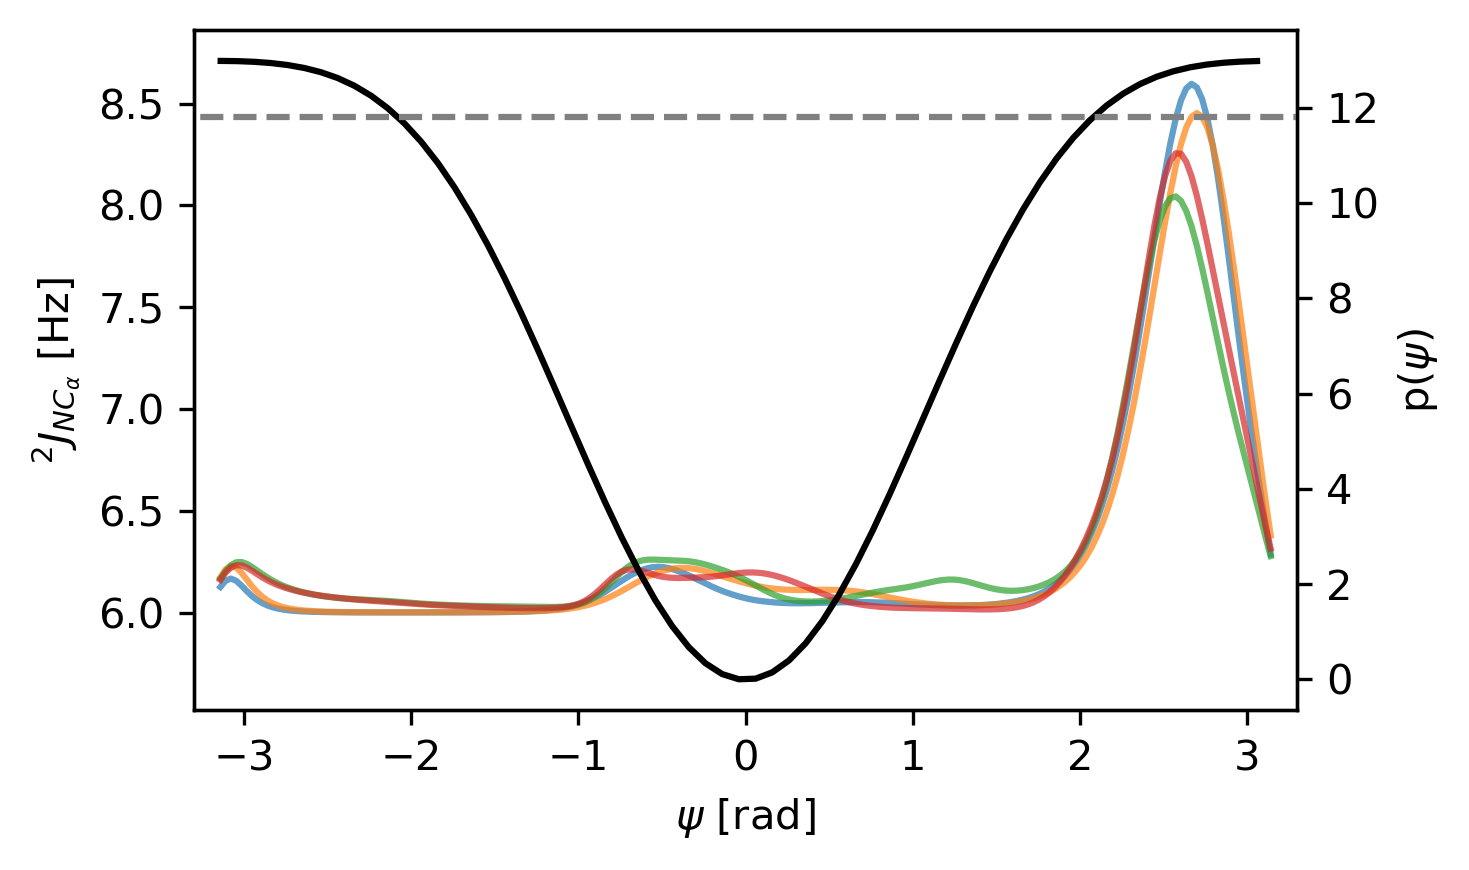

In [249]:
fig, ax1 = plt.subplots(figsize=(5,3),facecolor='w',dpi=300)
ax1.plot(np.arange(-3.14,3.14,0.1), nca, color='k',zorder=300)
ax1.set_ylabel(r'$^{2}J_{NC_{\alpha}}$ [Hz]')
ax1.set_xlabel(r'$\psi$ [rad]')
for k,v in nca_kde.items():
    ax1.plot(v[0],v[1]*2+6,alpha=0.7,label=k)
#ax1.legend(ncol=4, loc='upper center')
ax1.hlines(b,-10,10,color='0.5',linestyles='dashed',zorder=500)

ax2 = ax1.twinx()
for k,v in nca_kde.items():
    ax2.plot(v[0],v[1]*10,alpha=0.,label=k)
ax2.set_ylabel(r'p($\psi$)')

fig.tight_layout()
plt.xlim(-3.3,3.3)
plt.savefig('2J-NCA_dist.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [120]:
jc = {'A' : [],
     'B' : [],
     'C' : [],
     'D' : []}
for k,v in a7_t.items():
    _, phi = md.compute_phi(v)
    _, psi = md.compute_psi(v)
    for i in range(len(exp_jc)):
        jc[k].append(jcoupling_KLL(exp_jc.jtype[i], exp_jc.res[i], phi, psi, v))

In [82]:
exp_jc = pd.read_csv('jc_a7.mod', delimiter = " ")
fwerr = {
    "3J-HNHA" : 0.70,
    "3J-HNC" : 0.45,
    "3J-HAC" : 0.29,
    "3J-HNCB" : 0.30,
    "1J-NCA" : 0.59,
    "2J-NCA" : 0.50,
    "3J-HNCA" : 0.10
}
err = []
for j in exp_jc.jtype:
    err.append(fwerr[j])

In [121]:
for k,v in jc.items():
    print( k, chi2(np.array(v),np.array(exp_jc.jc),np.array(err)) )

A 19.78234806858515
B 98.06790657388062
C 39.59183802292617
D 53.08442166405881


In [95]:
j3J_HNHA = {'A' : [],
     'B' : [],
     'C' : [],
     'D' : []}
j3J_HNC = {'A' : [],
     'B' : [],
     'C' : [],
     'D' : []}
j3J_HAC = {'A' : [],
     'B' : [],
     'C' : [],
     'D' : []}
j3J_HNCB = {'A' : [],
     'B' : [],
     'C' : [],
     'D' : []}
j1J_NCA = {'A' : [],
     'B' : [],
     'C' : [],
     'D' : []}
j2J_NCA = {'A' : [],
     'B' : [],
     'C' : [],
     'D' : []}
j3J_HNCA = {'A' : [],
     'B' : [],
     'C' : [],
     'D' : []}
for n,j in enumerate(np.array(exp_jc.jtype)):
    if j == '3J-HNHA':
        j3J_HNHA['A'].append(np.array([exp_jc.res[n],jc['A'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNHA['B'].append(np.array([exp_jc.res[n],jc['B'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNHA['C'].append(np.array([exp_jc.res[n],jc['C'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNHA['D'].append(np.array([exp_jc.res[n],jc['D'][n],exp_jc.jc[n],fwerr[j]]))
    elif j == '3J-HNC':
        j3J_HNC['A'].append(np.array([exp_jc.res[n],jc['A'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNC['B'].append(np.array([exp_jc.res[n],jc['B'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNC['C'].append(np.array([exp_jc.res[n],jc['C'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNC['D'].append(np.array([exp_jc.res[n],jc['D'][n],exp_jc.jc[n],fwerr[j]]))
    elif j == '3J-HAC':
        j3J_HAC['A'].append(np.array([exp_jc.res[n],jc['A'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HAC['B'].append(np.array([exp_jc.res[n],jc['B'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HAC['C'].append(np.array([exp_jc.res[n],jc['C'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HAC['D'].append(np.array([exp_jc.res[n],jc['D'][n],exp_jc.jc[n],fwerr[j]]))
    elif j == '3J-HNCB':
        j3J_HNCB['A'].append(np.array([exp_jc.res[n],jc['A'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNCB['B'].append(np.array([exp_jc.res[n],jc['B'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNCB['C'].append(np.array([exp_jc.res[n],jc['C'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNCB['D'].append(np.array([exp_jc.res[n],jc['D'][n],exp_jc.jc[n],fwerr[j]]))
    elif j == '1J-NCA':
        j1J_NCA['A'].append(np.array([exp_jc.res[n],jc['A'][n],exp_jc.jc[n],fwerr[j]]))
        j1J_NCA['B'].append(np.array([exp_jc.res[n],jc['B'][n],exp_jc.jc[n],fwerr[j]]))
        j1J_NCA['C'].append(np.array([exp_jc.res[n],jc['C'][n],exp_jc.jc[n],fwerr[j]]))
        j1J_NCA['D'].append(np.array([exp_jc.res[n],jc['D'][n],exp_jc.jc[n],fwerr[j]]))
    elif j == '2J-NCA':
        j2J_NCA['A'].append(np.array([exp_jc.res[n],jc['A'][n],exp_jc.jc[n],fwerr[j]]))
        j2J_NCA['B'].append(np.array([exp_jc.res[n],jc['B'][n],exp_jc.jc[n],fwerr[j]]))
        j2J_NCA['C'].append(np.array([exp_jc.res[n],jc['C'][n],exp_jc.jc[n],fwerr[j]]))
        j2J_NCA['D'].append(np.array([exp_jc.res[n],jc['D'][n],exp_jc.jc[n],fwerr[j]]))
    elif j == '3J-HNCA':
        j3J_HNCA['A'].append(np.array([exp_jc.res[n],jc['A'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNCA['B'].append(np.array([exp_jc.res[n],jc['B'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNCA['C'].append(np.array([exp_jc.res[n],jc['C'][n],exp_jc.jc[n],fwerr[j]]))
        j3J_HNCA['D'].append(np.array([exp_jc.res[n],jc['D'][n],exp_jc.jc[n],fwerr[j]]))

In [96]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

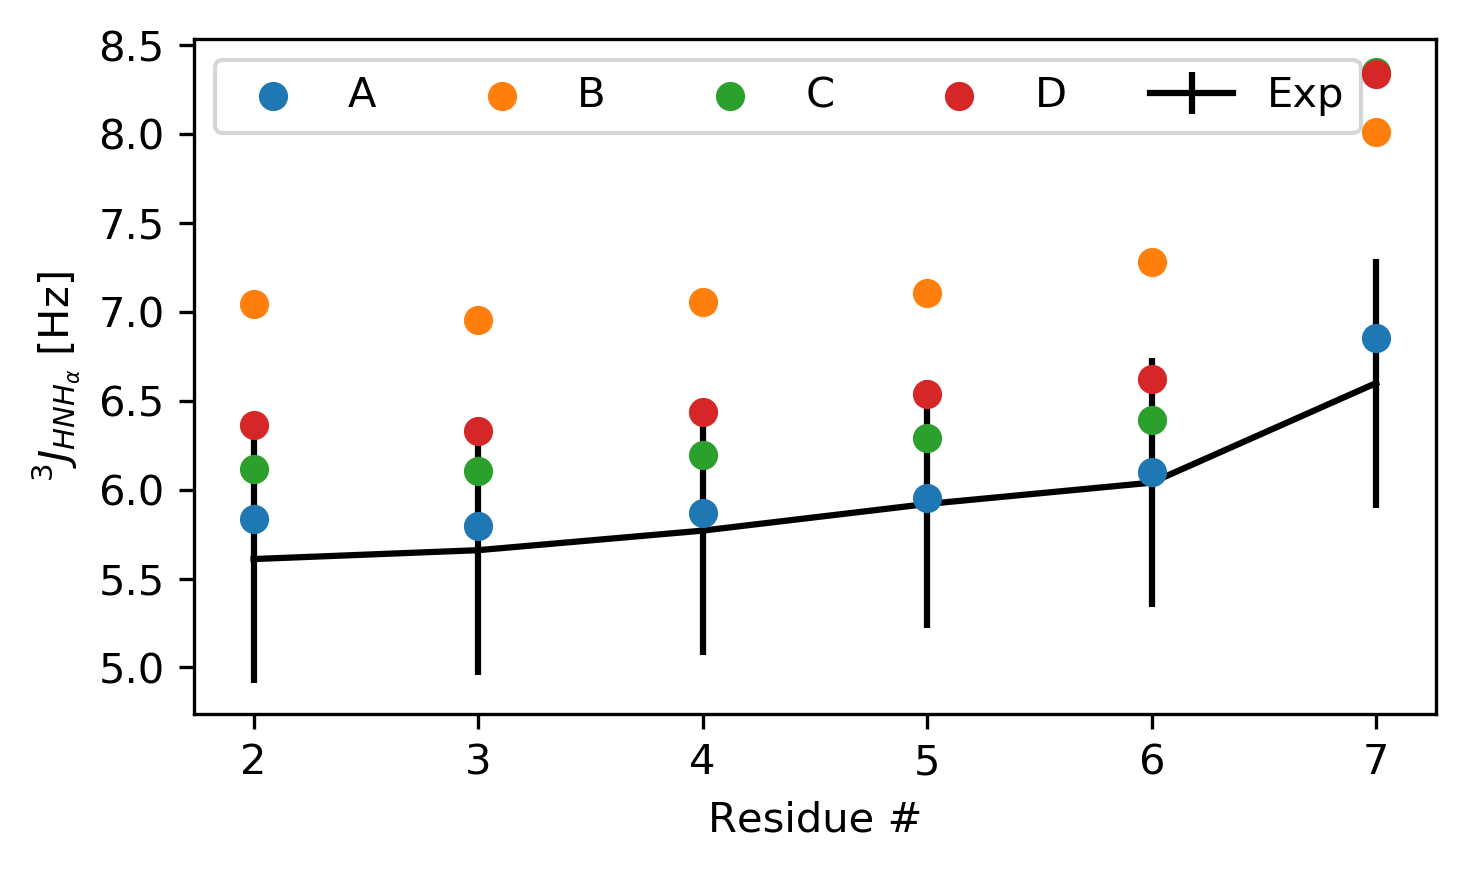

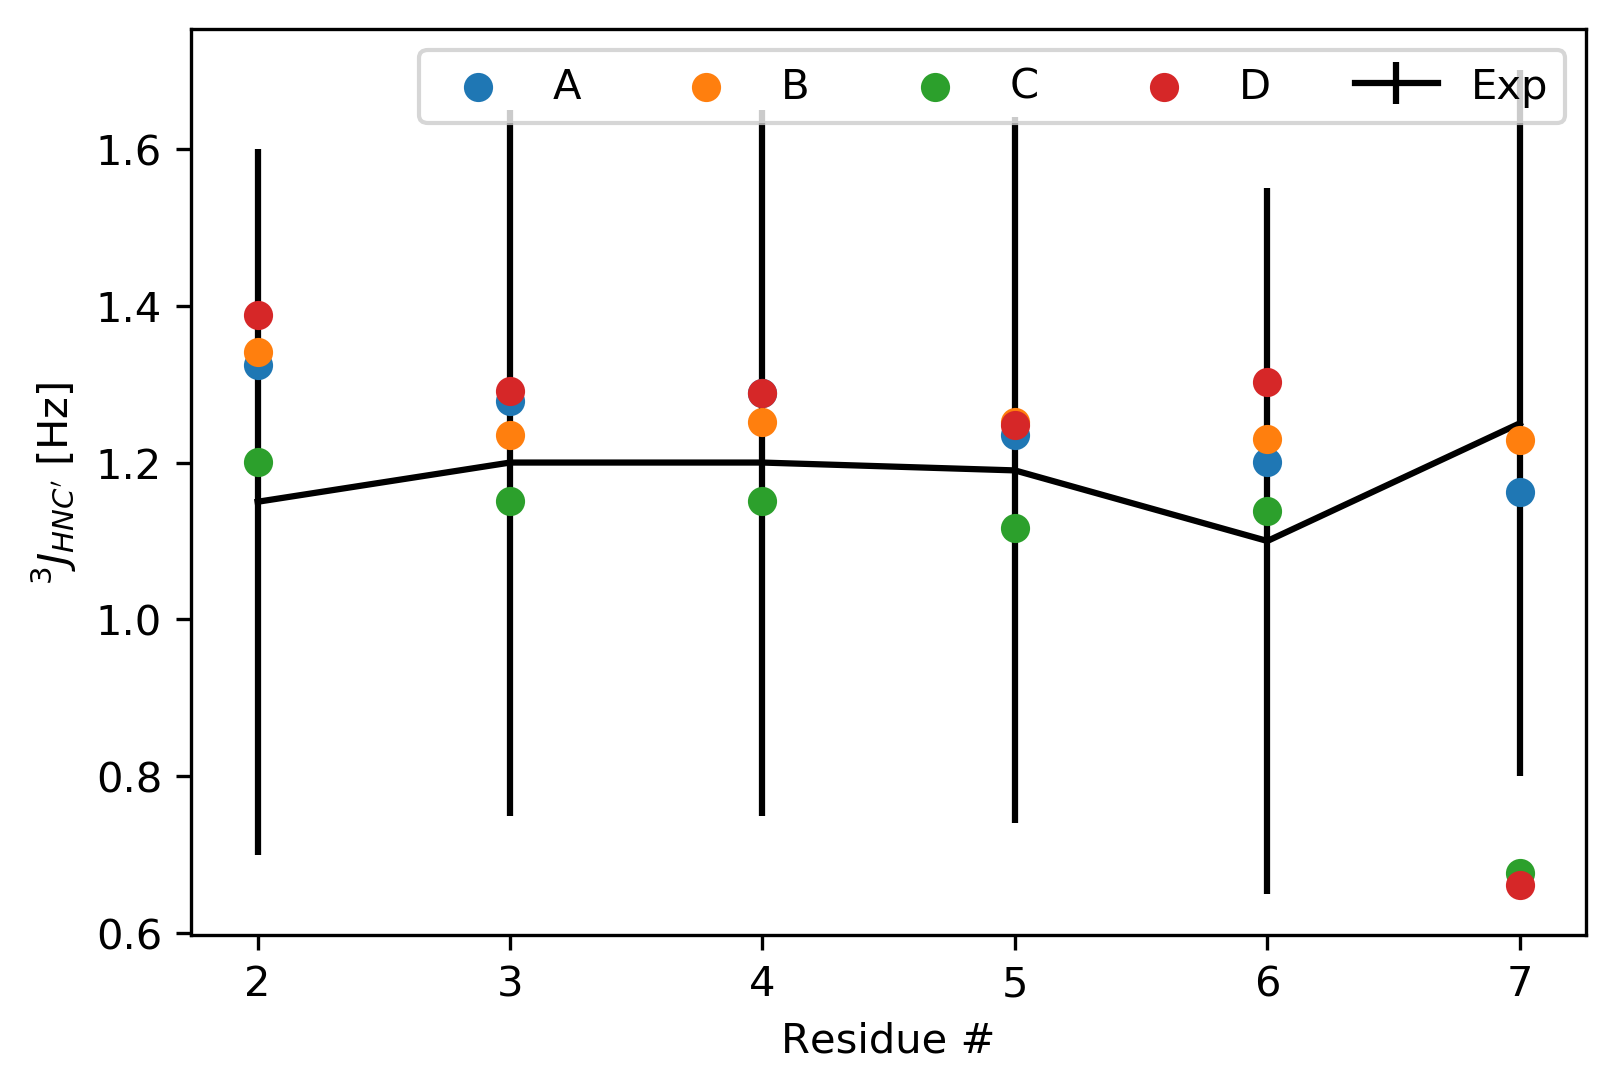

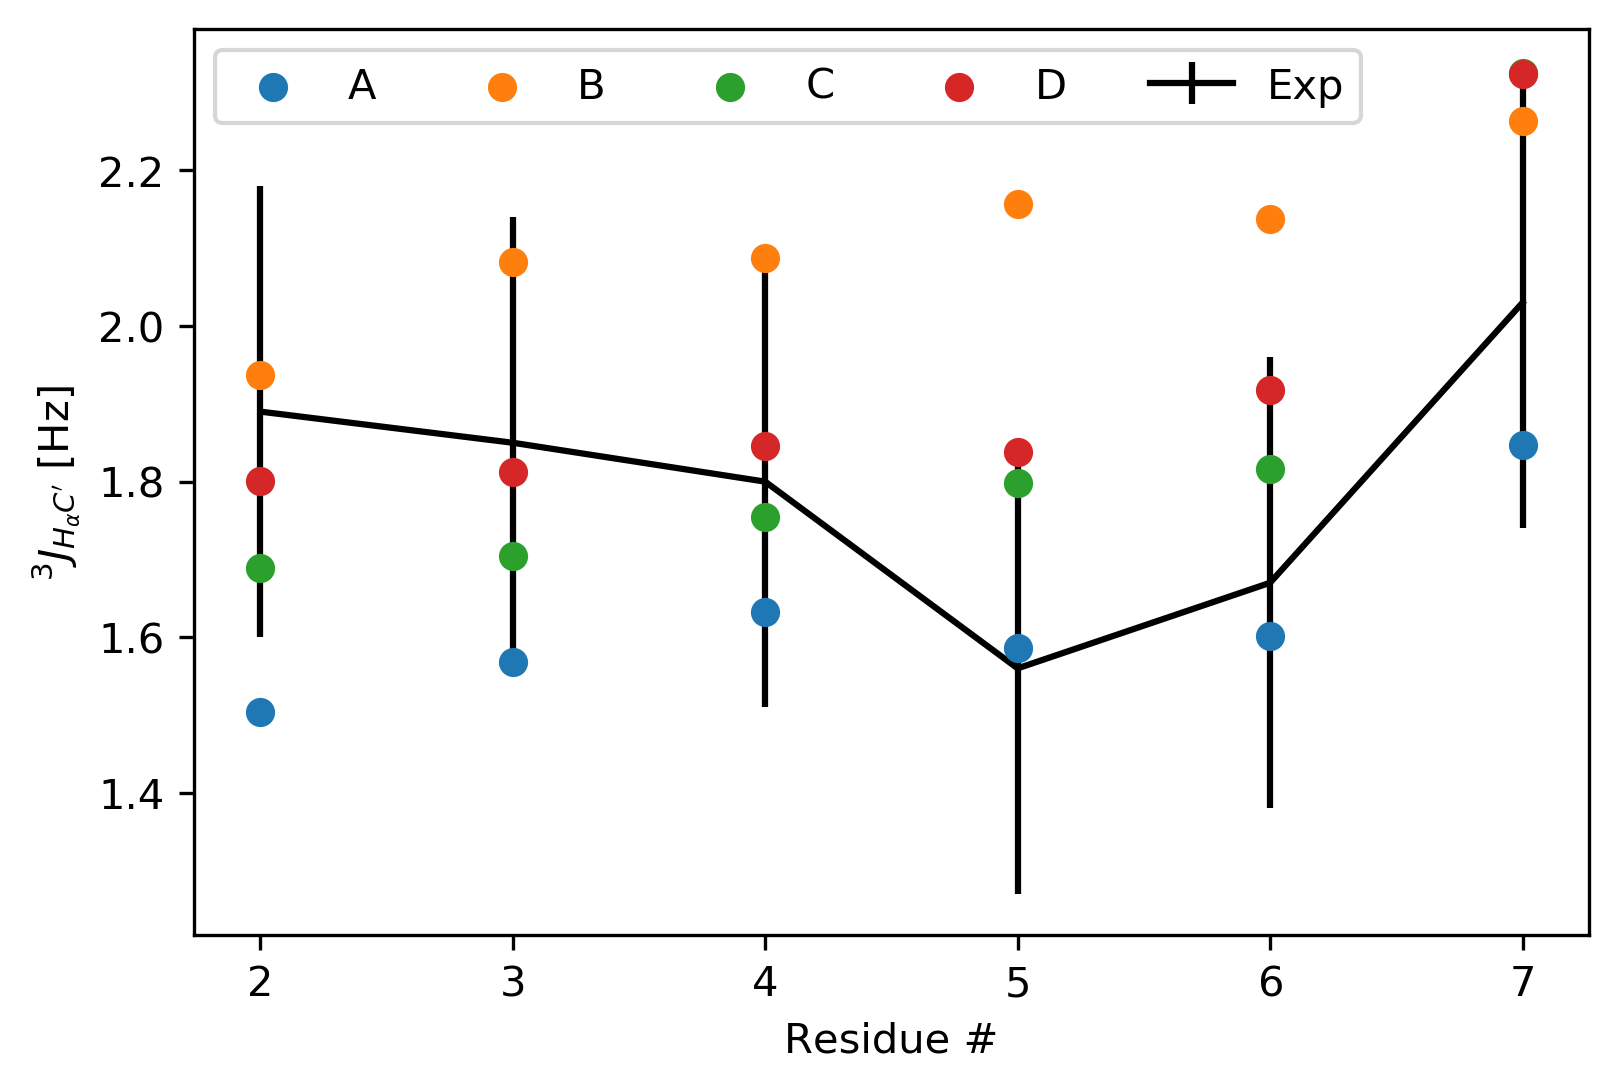

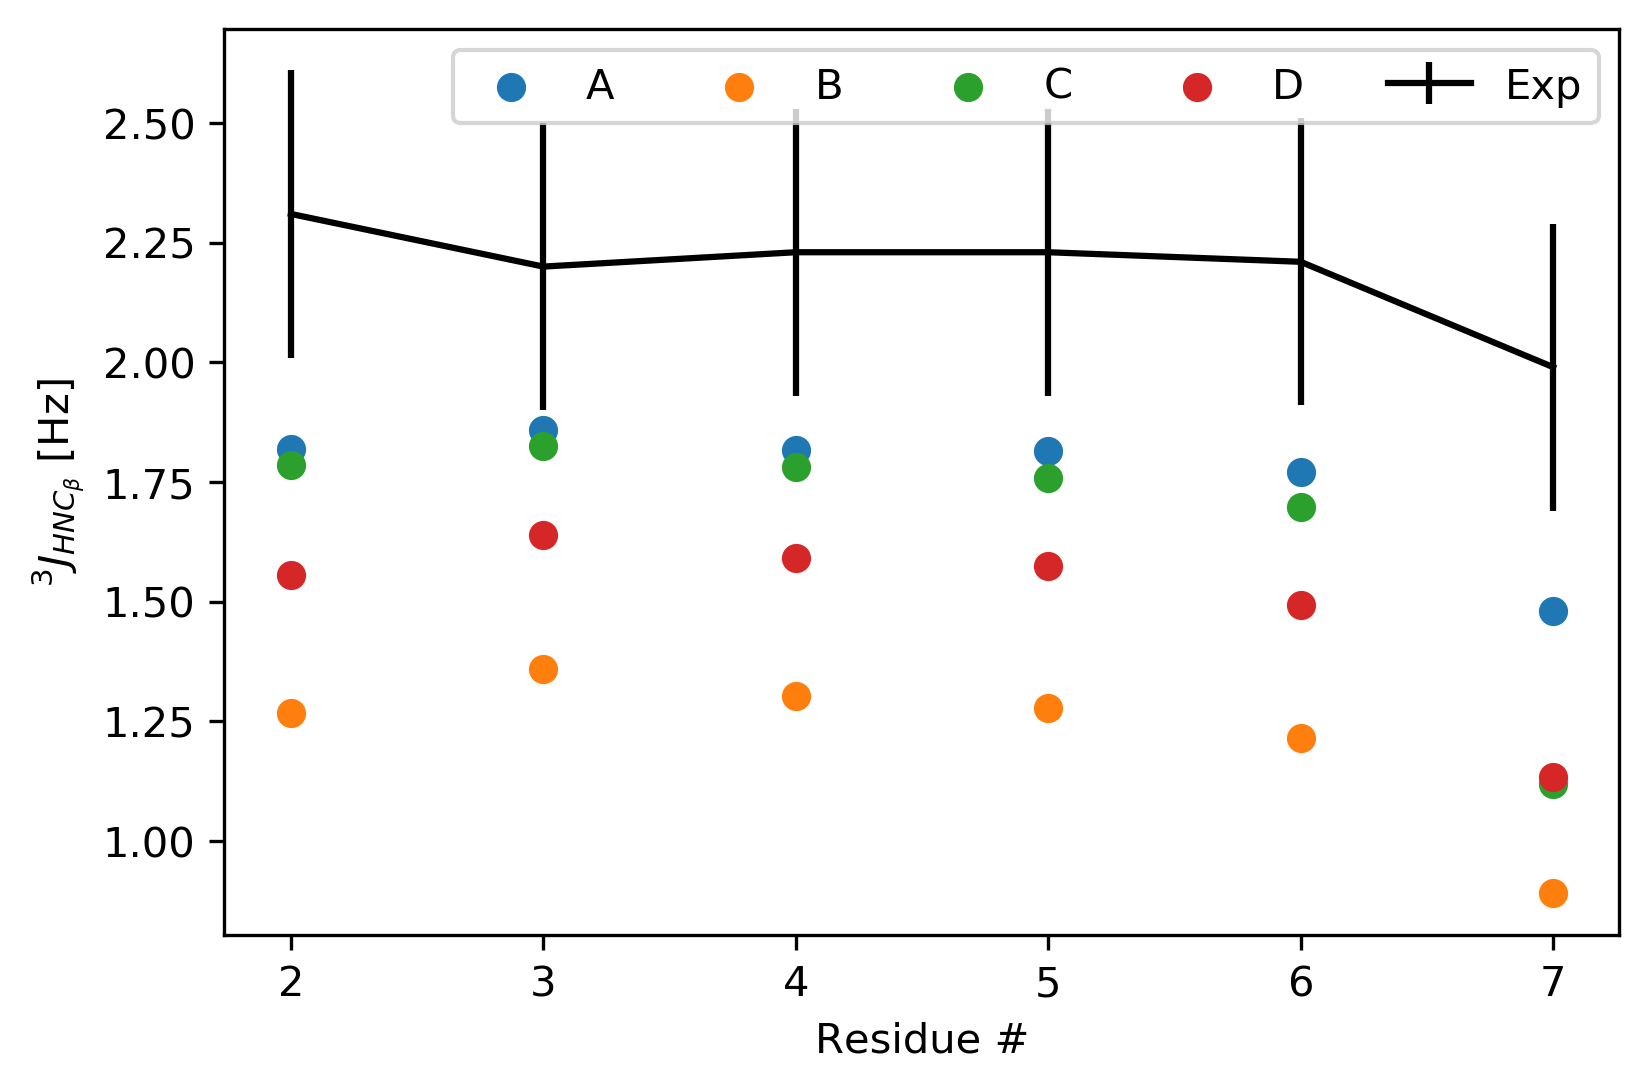

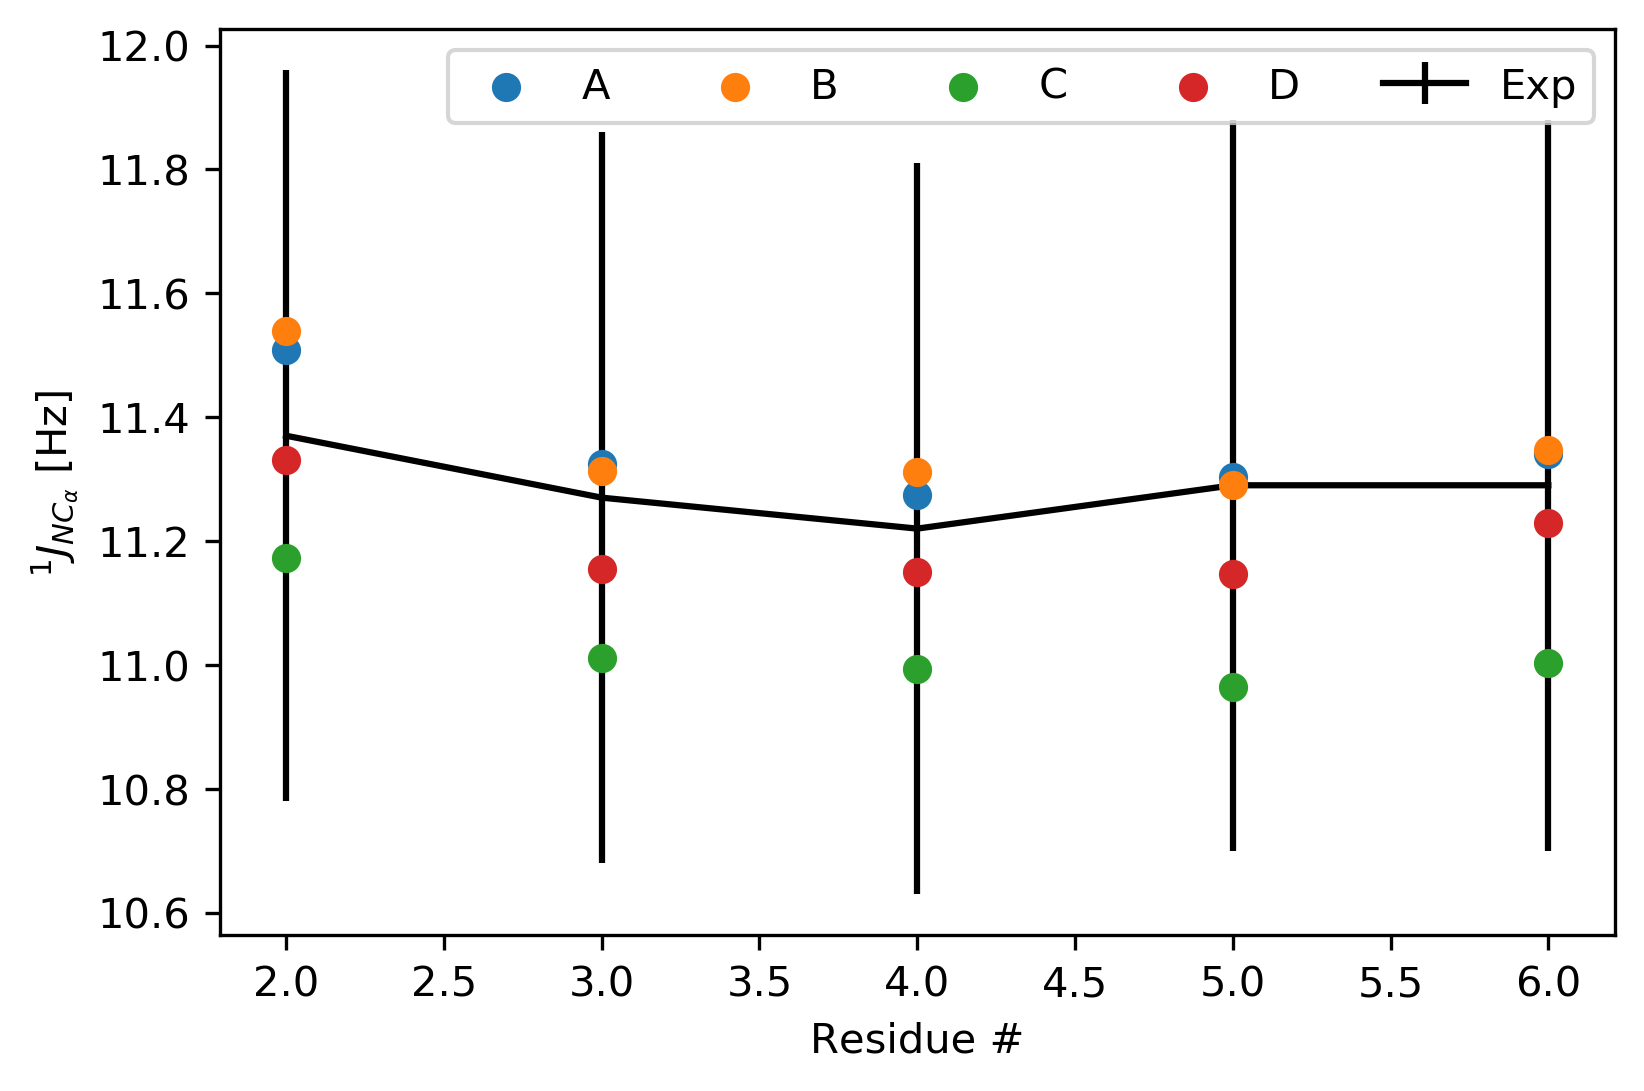

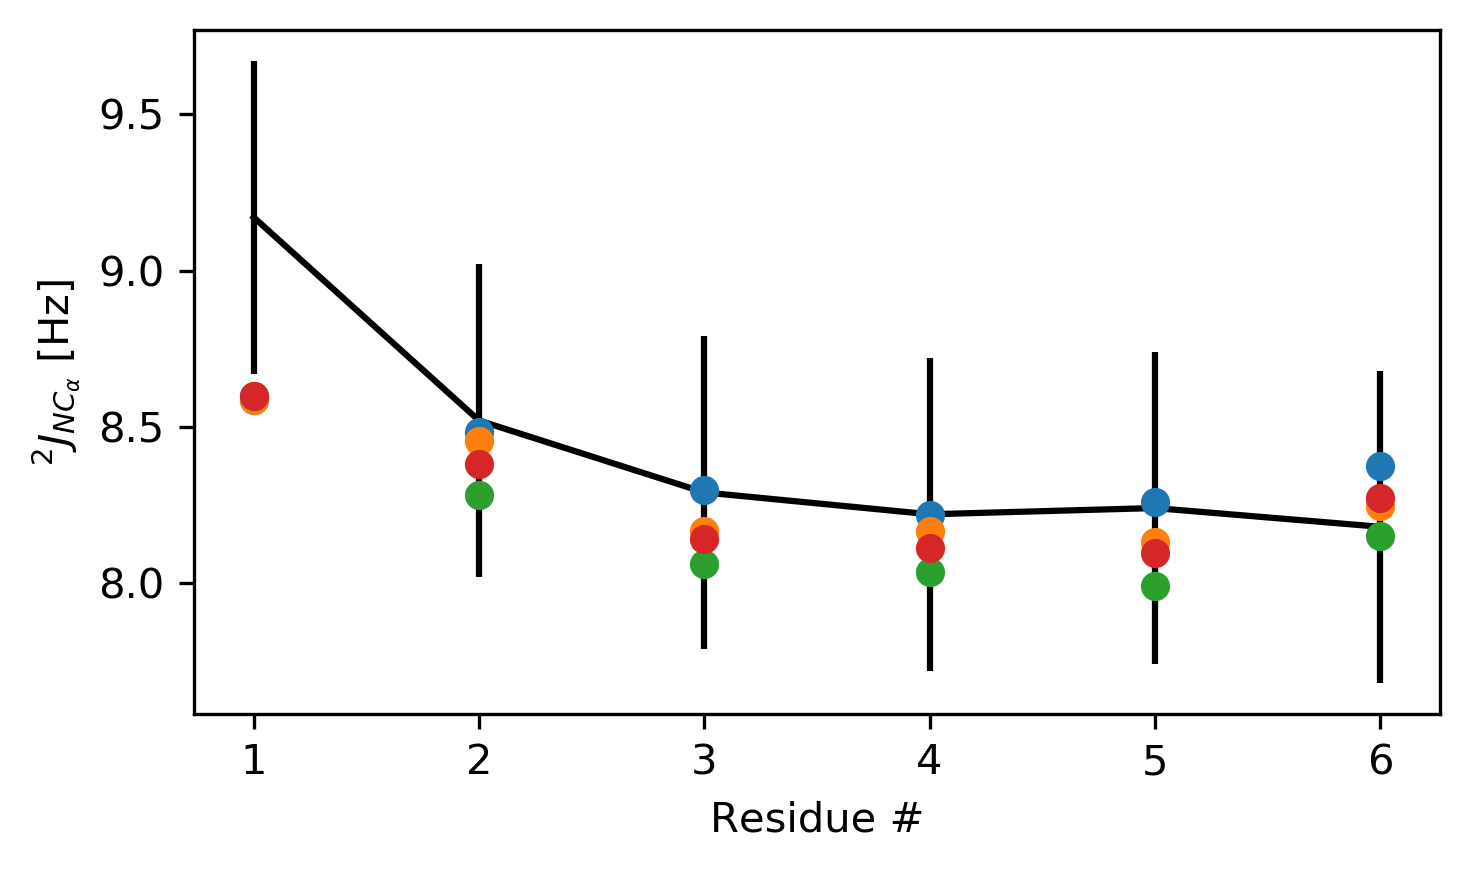

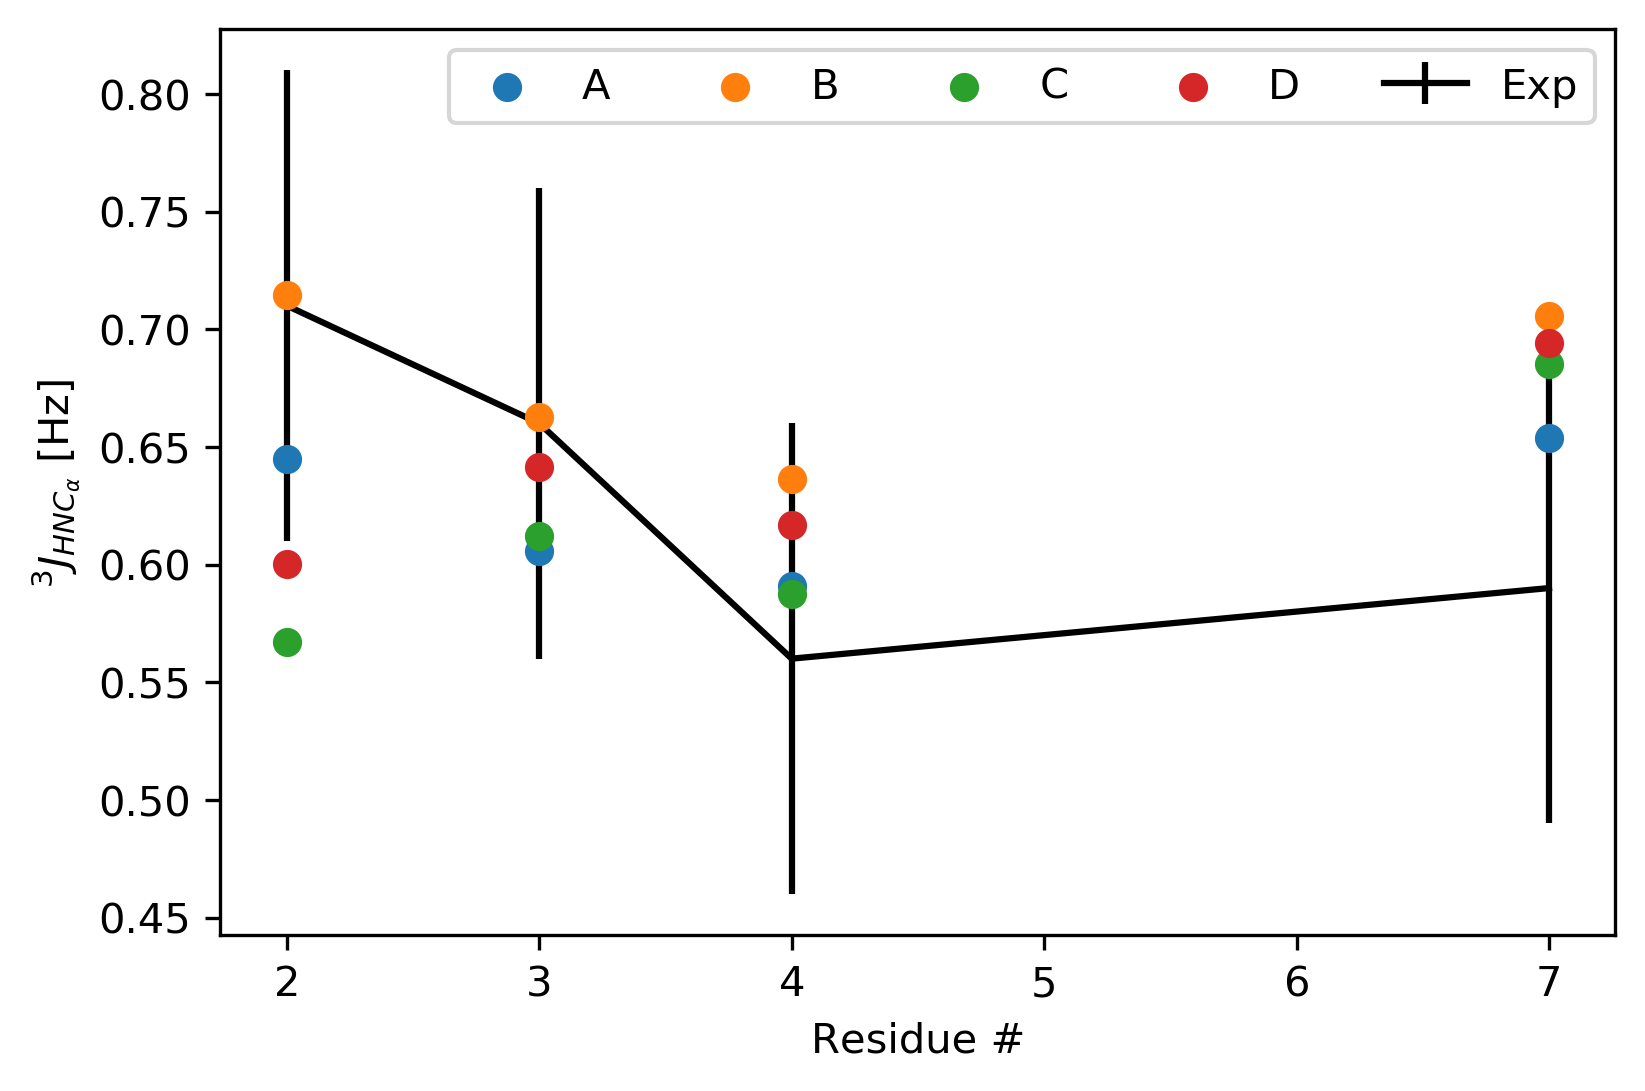

In [251]:
plt.figure(figsize=(5,3),facecolor='w',dpi=300)
c = 0
for k,v in j3J_HNHA.items():
    v = np.array(v)
    plt.scatter(v[...,0],v[...,1], c=colors[c], zorder=300, label=k)
    c+=1
plt.errorbar(v[...,0], v[...,2], v[...,3], color='k', label='Exp')
plt.xlabel('Residue #')
plt.ylabel(r'$^{3}J_{HNH_{\alpha}}$ [Hz]')
plt.legend(ncol=5)
plt.tight_layout()
plt.savefig('3J-HNHA.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

plt.figure(figsize=(6,4),facecolor='w',dpi=300)
c = 0
for k,v in j3J_HNC.items():
    v = np.array(v)
    plt.scatter(v[...,0],v[...,1], c=colors[c], zorder=300, label=k)
    c+=1
plt.errorbar(v[...,0], v[...,2], v[...,3], color='k', label='Exp')
plt.xlabel('Residue #')
plt.ylabel(r'$^{3}J_{HNC^{\prime}}$ [Hz]')
plt.legend(ncol=5)
plt.savefig('3J-HNC.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

plt.figure(figsize=(6,4),facecolor='w',dpi=300)
c = 0
for k,v in j3J_HAC.items():
    v = np.array(v)
    plt.scatter(v[...,0],v[...,1], c=colors[c], zorder=300, label=k)
    c+=1
plt.errorbar(v[...,0], v[...,2], v[...,3], color='k', label='Exp')
plt.xlabel('Residue #')
plt.ylabel(r'$^{3}J_{H_{\alpha}C^{\prime}}$ [Hz]')
plt.legend(ncol=5)
plt.savefig('3J-HAC.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

plt.figure(figsize=(6,4),facecolor='w',dpi=300)
c = 0
for k,v in j3J_HNCB.items():
    v = np.array(v)
    plt.scatter(v[...,0],v[...,1], c=colors[c], zorder=300, label=k)
    c+=1
plt.errorbar(v[...,0], v[...,2], v[...,3], color='k', label='Exp')
plt.xlabel('Residue #')
plt.ylabel(r'$^{3}J_{HNC_{\beta}}$ [Hz]')
plt.legend(ncol=5)
plt.savefig('3J-HNCB.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

plt.figure(figsize=(6,4),facecolor='w',dpi=300)
c = 0
for k,v in j1J_NCA.items():
    v = np.array(v)
    plt.scatter(v[...,0],v[...,1], c=colors[c], zorder=300, label=k)
    c+=1
plt.errorbar(v[...,0], v[...,2], v[...,3], color='k', label='Exp')
plt.xlabel('Residue #')
plt.ylabel(r'$^{1}J_{NC_{\alpha}}$ [Hz]')
plt.legend(ncol=5)
plt.savefig('1J-NCA.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

plt.figure(figsize=(5,3),facecolor='w',dpi=300)
c = 0
for k,v in j2J_NCA.items():
    v = np.array(v)
    plt.scatter(v[...,0],v[...,1], c=colors[c], zorder=300, label=k)
    c+=1
plt.errorbar(v[...,0], v[...,2], v[...,3], color='k', label='Exp')
plt.xlabel('Residue #')
plt.ylabel(r'$^{2}J_{NC_{\alpha}}$ [Hz]')
#plt.legend(ncol=5)
plt.tight_layout()
plt.savefig('2J-NCA.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

plt.figure(figsize=(6,4),facecolor='w',dpi=300)
c = 0
for k,v in j3J_HNCA.items():
    v = np.array(v)
    plt.scatter(v[...,0],v[...,1], c=colors[c], zorder=300, label=k)
    c+=1
plt.errorbar(v[...,0], v[...,2], v[...,3], color='k', label='Exp')
plt.xlabel('Residue #')
plt.ylabel(r'$^{3}J_{HNC_{\alpha}}$ [Hz]')
plt.legend(ncol=5)
plt.savefig('3J-HNCA.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()